**NAME**: CHOKKAM CHANDU

**HT_NO**:2203A52081

**BATCH**:31

**PROJECT:** **FOOD DELIVERY TIME PREDICTION**

# Import Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
from geopy.distance import geodesic

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Load & Understand Data

In [7]:
df_train = pd.read_csv('train.csv')
df_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [8]:
df_train.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

**SHAPE AND DESCRIPTION OF THE DATASET**

In [9]:
print("Train Dataset :", df_train.shape)

Train Dataset : (45593, 20)


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [11]:
df_train.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [12]:

df_train.describe(exclude=np.number).T

,count,unique,top,freq
ID,45593,45593,0x4607,1
Delivery_person_ID,45593,1320,PUNERES01DEL01,67
Delivery_person_Age,45593,23,35,2262
Delivery_person_Ratings,45593,29,4.8,7148
Order_Date,45593,44,15-03-2022,1192
Time_Orderd,45593,177,NaN,1731
Time_Order_picked,45593,193,21:30:00,496
Weatherconditions,45593,7,conditions Fog,7654
Road_traffic_density,45593,5,Low,15477
Type_of_order,45593,4,Snack,11533


In [13]:
#Explore each column
for column in df_train.columns:
    print(column)
    print(df_train[column].value_counts())
    print("------------------------------------")

ID
ID
0x4607     1
0x1f3e     1
0xe251     1
0x3f31     1
0x4a78     1
          ..
0xc3f1     1
0x5db7     1
0x1985     1
0xceda     1
0x5fb2     1
Name: count, Length: 45593, dtype: int64
------------------------------------
Delivery_person_ID
Delivery_person_ID
PUNERES01DEL01     67
JAPRES11DEL02      67
HYDRES04DEL02      66
JAPRES03DEL01      66
VADRES11DEL02      66
                   ..
DEHRES18DEL03       7
AURGRES11DEL03      7
KOLRES09DEL03       6
KOCRES16DEL03       6
BHPRES010DEL03      5
Name: count, Length: 1320, dtype: int64
------------------------------------
Delivery_person_Age
Delivery_person_Age
35      2262
36      2260
37      2227
30      2226
38      2219
24      2210
32      2202
22      2196
29      2191
33      2187
28      2179
25      2174
34      2166
26      2159
21      2153
27      2150
39      2144
20      2136
31      2120
23      2087
NaN     1854
50        53
15        38
Name: count, dtype: int64
------------------------------------
Delivery_perso

# DATA CLEANING AND VISUALISATION

In [14]:

def update_column_name(df):

    df.rename(columns={'Weatherconditions': 'Weather_conditions'},inplace=True)

update_column_name(df_train)
print(df_train.columns)

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')


In [15]:

def extract_column_value(df):

    df['Time_taken(min)'] = df['Time_taken(min)'].apply(lambda x: int(x.split(' ')[1].strip()))

    df['Weather_conditions'] = df['Weather_conditions'].apply(lambda x: x.split(' ')[1].strip())

    df['City_code']=df['Delivery_person_ID'].str.split("RES", expand=True)[0]

extract_column_value(df_train)
df_train[['Time_taken(min)','Weather_conditions','City_code']].head()

,Time_taken(min),Weather_conditions,City_code
0,24,Sunny,INDO
1,33,Stormy,BANG
2,26,Sandstorms,BANG
3,21,Sunny,COIMB
4,30,Cloudy,CHEN


In [16]:

def extract_column_value(df):
    # Modify the 'Time_taken(min)' column and convert the data to type int
    df['Time_taken(min)'] = df['Time_taken(min)'].apply(lambda x: int(x))
    # Modify the 'Weather_conditions' column
    df['Weather_conditions'] = df['Weather_conditions'].apply(lambda x: x.split(' ')[0].strip())

# Call the function to apply the transformations
extract_column_value(df_train)

# Display the first few rows of the modified DataFrame
df_train[['Time_taken(min)', 'Weather_conditions']].head()


,Time_taken(min),Weather_conditions
0,24,Sunny
1,33,Stormy
2,26,Sandstorms
3,21,Sunny
4,30,Cloudy


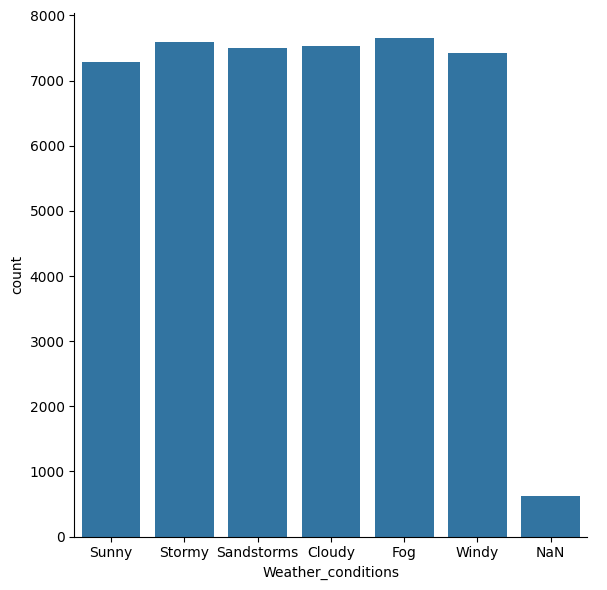

In [17]:
import seaborn as sns

# Set the height of the plot
sns.catplot(x='Weather_conditions', data=df_train, kind='count', height=6)


In [18]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit and transform the 'Weather_conditions' column using label encoding
df_train['Weather_conditions_numerical'] = label_encoder.fit_transform(df_train['Weather_conditions'])

# Display the mapping of original categorical values to numerical values
print("Mapping of original values to numerical values:")
for original_value, numerical_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original_value}: {numerical_value}")


Mapping of original values to numerical values:
Cloudy: 0
Fog: 1
NaN: 2
Sandstorms: 3
Stormy: 4
Sunny: 5
Windy: 6


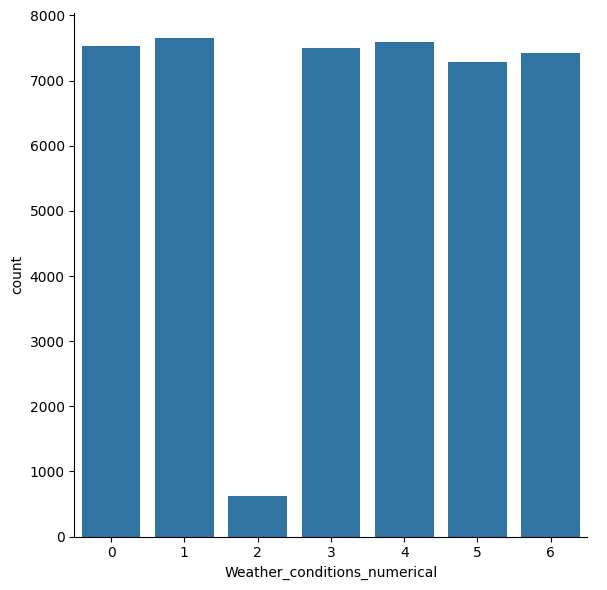

In [19]:
import seaborn as sns

# Set the height of the plot
sns.catplot(x='Weather_conditions_numerical', data=df_train, kind='count', height=6)

In [20]:
import numpy as np

# Calculate the mean of the numerical values excluding NaN
mean_weather_conditions = np.nanmean(df_train['Weather_conditions_numerical'])

# Replace NaN values in the 'Weather_conditions_numerical' column with the mean
df_train['Weather_conditions_numerical'].fillna(mean_weather_conditions, inplace=True)

# Display the updated mapping of original values to numerical values
print("Updated Mapping of original values to numerical values:")
for original_value, numerical_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original_value}: {numerical_value}")


Updated Mapping of original values to numerical values:
Cloudy: 0
Fog: 1
NaN: 2
Sandstorms: 3
Stormy: 4
Sunny: 5
Windy: 6


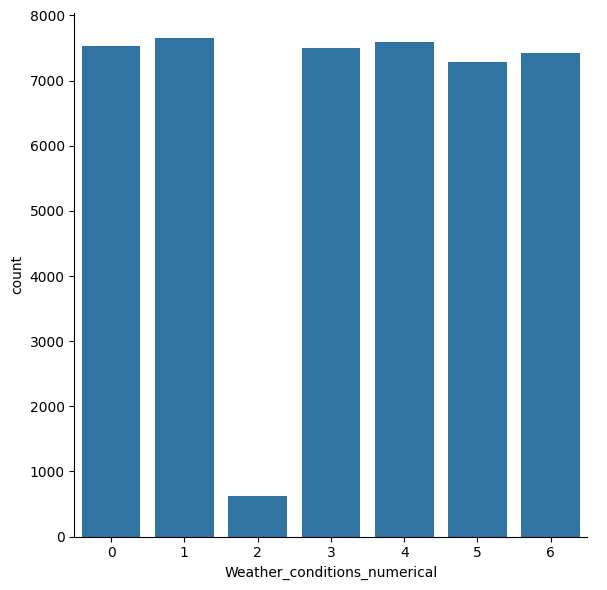

In [21]:
import seaborn as sns

# Set the height of the plot
sns.catplot(x='Weather_conditions_numerical', data=df_train, kind='count', height=6)

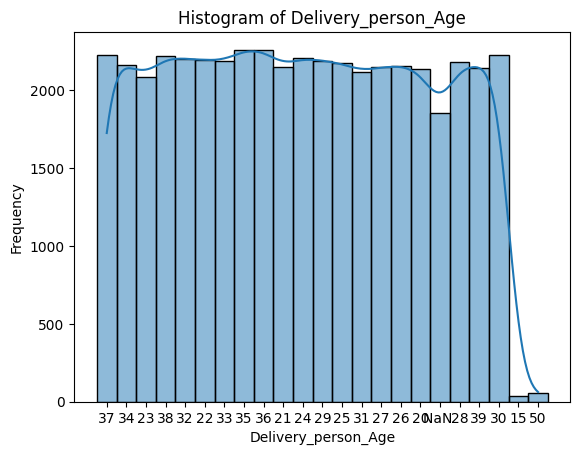

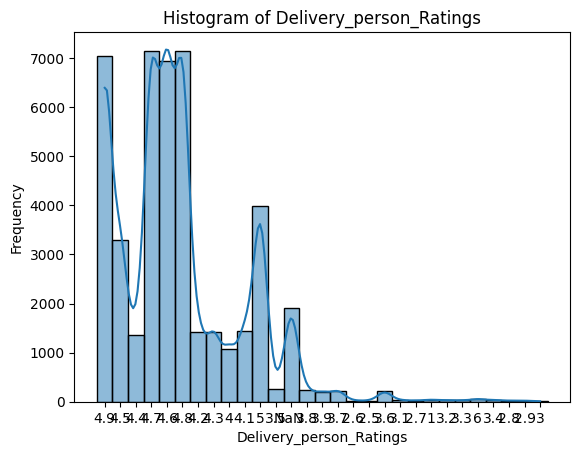

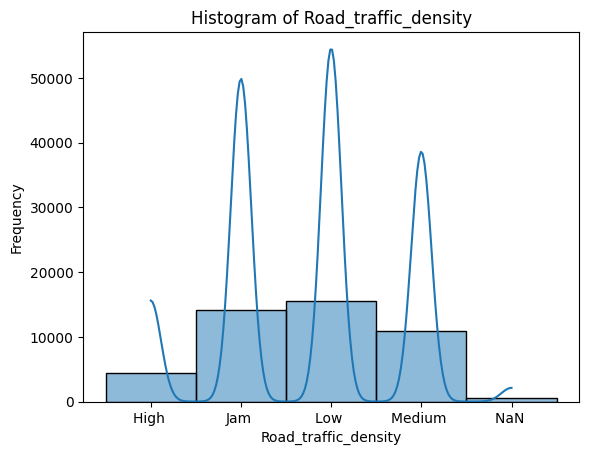

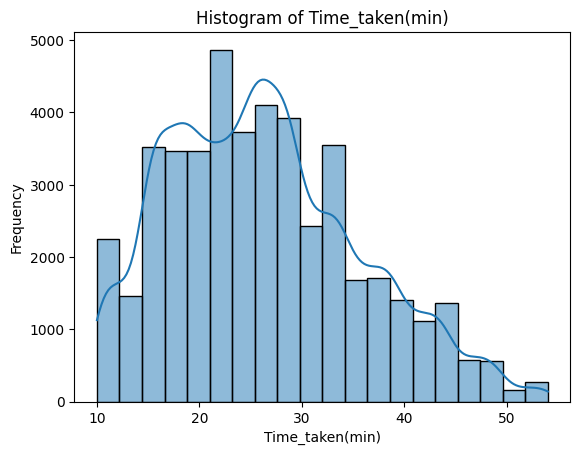

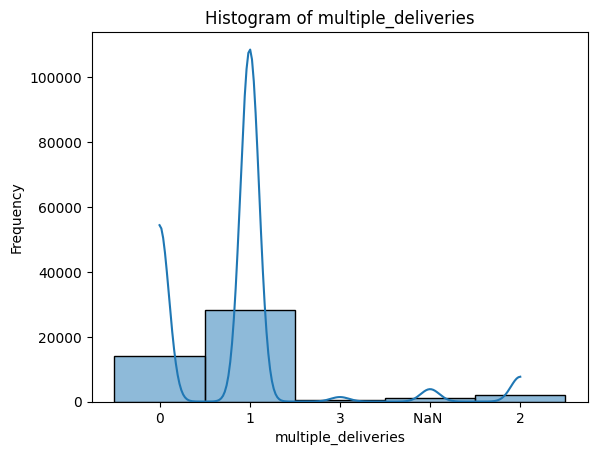

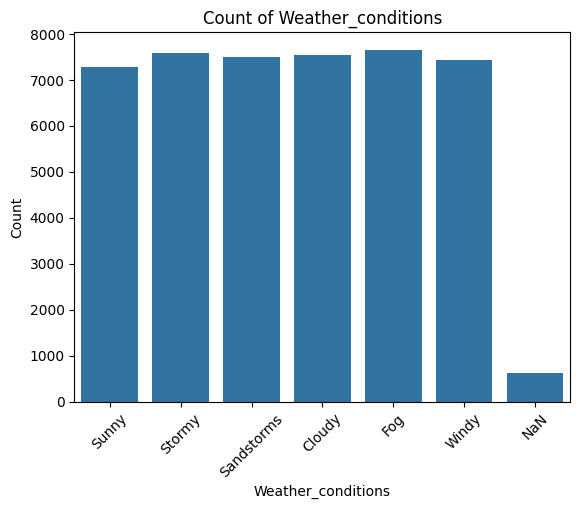

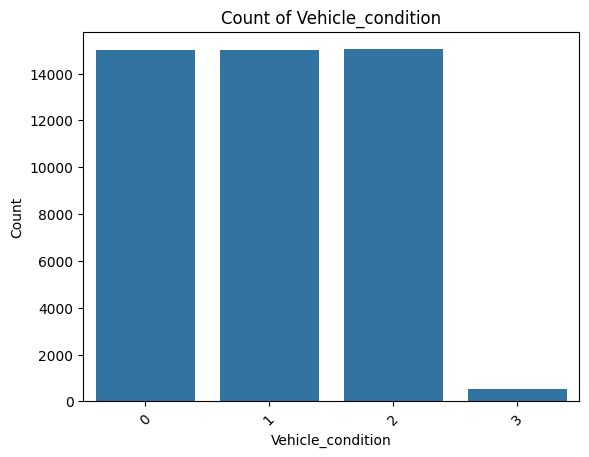

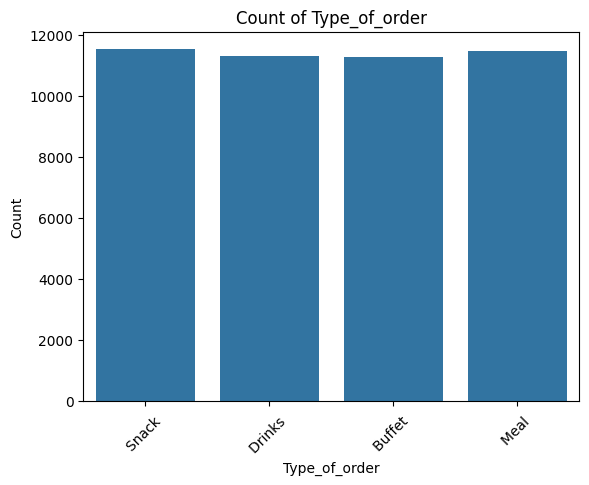

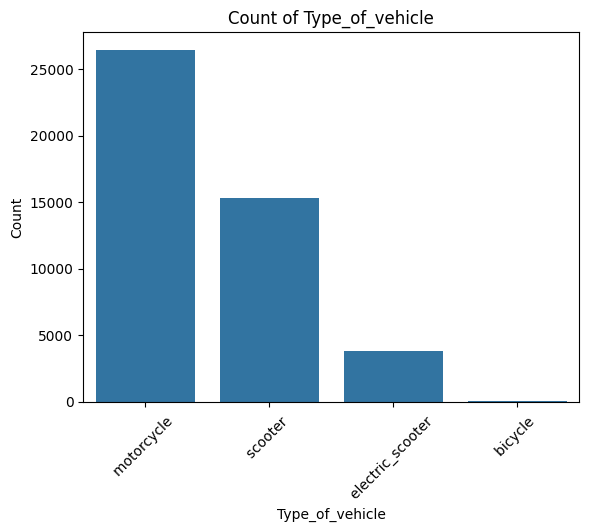

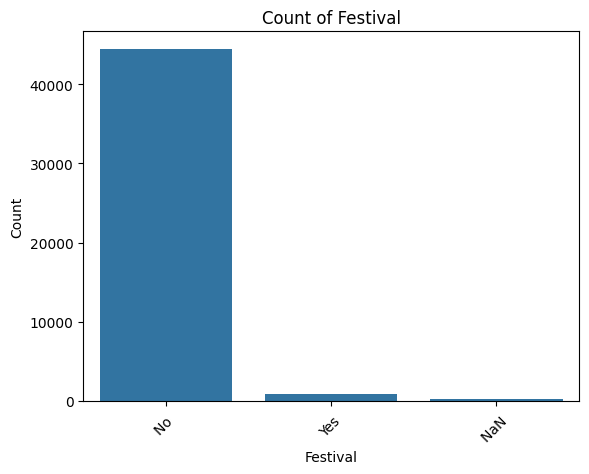

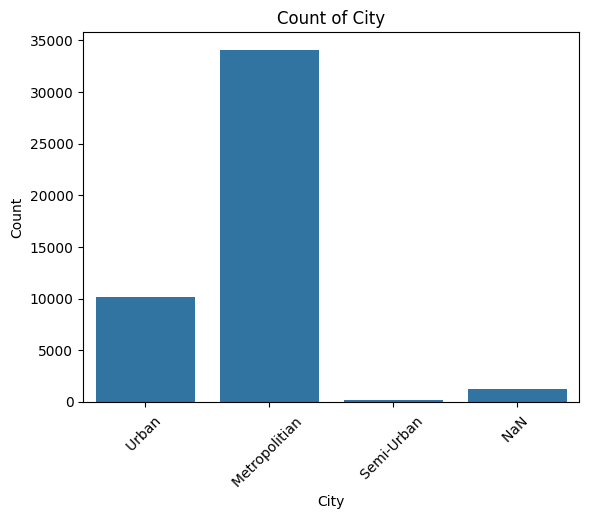

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the numerical features
numerical_features = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Road_traffic_density', 'Time_taken(min)','multiple_deliveries']

# Create histograms for numerical features
for feature in numerical_features:
    sns.histplot(df_train[feature], bins=20, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Define the categorical features
categorical_features = ['Weather_conditions', 'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle', 'Festival', 'City']

# Create count plots for categorical features
for feature in categorical_features:
    sns.countplot(x=feature, data=df_train)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.show()

# If you have temporal features, you can create time series plots or seasonal decomposition plots as needed.


In [23]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit and transform the 'Weather_conditions' column using label encoding
df_train['Type_of_order_numerical'] = label_encoder.fit_transform(df_train['Type_of_order'])

# Display the mapping of original categorical values to numerical values
print("Mapping of original values to numerical values:")
for original_value, numerical_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original_value}: {numerical_value}")


Mapping of original values to numerical values:
Buffet : 0
Drinks : 1
Meal : 2
Snack : 3


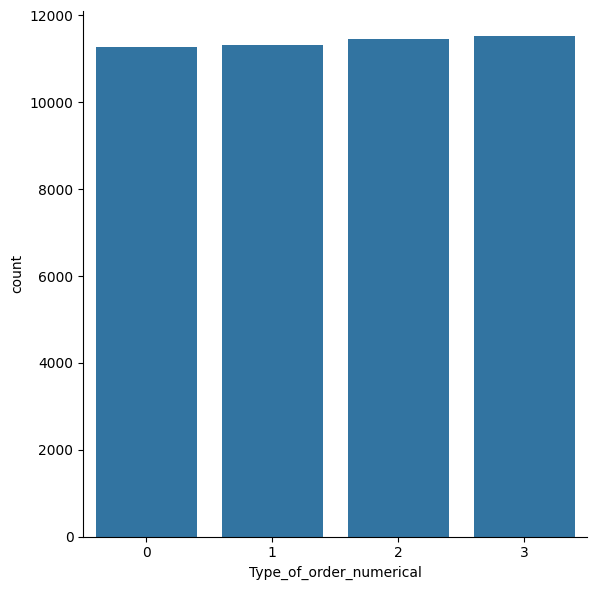

In [24]:
import seaborn as sns

# Set the height of the plot
sns.catplot(x='Type_of_order_numerical', data=df_train, kind='count', height=6)

In [25]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit and transform the 'Weather_conditions' column using label encoding
df_train['Type_of_vehicle_numerical'] = label_encoder.fit_transform(df_train['Type_of_vehicle'])

# Display the mapping of original categorical values to numerical values
print("Mapping of original values to numerical values:")
for original_value, numerical_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original_value}: {numerical_value}")



Mapping of original values to numerical values:
bicycle : 0
electric_scooter : 1
motorcycle : 2
scooter : 3


In [26]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit and transform the 'Weather_conditions' column using label encoding
df_train['Festival_numerical'] = label_encoder.fit_transform(df_train['Festival'])

# Display the mapping of original categorical values to numerical values
print("Mapping of original values to numerical values:")
for original_value, numerical_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original_value}: {numerical_value}")


Mapping of original values to numerical values:
NaN : 0
No : 1
Yes : 2


In [27]:
import numpy as np

# Calculate the mean of the numerical values excluding NaN
mean_weather_conditions = np.nanmean(df_train['Festival_numerical'])

# Replace NaN values in the 'Weather_conditions_numerical' column with the mean
df_train['Festival_numerical'].fillna(mean_weather_conditions, inplace=True)

# Display the updated mapping of original values to numerical values
print("Updated Mapping of original values to numerical values:")
for original_value, numerical_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original_value}: {numerical_value}")


Updated Mapping of original values to numerical values:
NaN : 0
No : 1
Yes : 2


In [28]:
import numpy as np

# Calculate the mean of the numerical values excluding NaN
mean_weather_conditions = np.nanmean(df_train['Type_of_vehicle_numerical'])

# Replace NaN values in the 'Weather_conditions_numerical' column with the mean
df_train['Type_of_vehicle_numerical'].fillna(mean_weather_conditions, inplace=True)

# Display the updated mapping of original values to numerical values
print("Updated Mapping of original values to numerical values:")
for original_value, numerical_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original_value}: {numerical_value}")

Updated Mapping of original values to numerical values:
NaN : 0
No : 1
Yes : 2


In [29]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit and transform the 'Weather_conditions' column using label encoding
df_train['City_numerical'] = label_encoder.fit_transform(df_train['City'])

# Display the mapping of original categorical values to numerical values
print("Mapping of original values to numerical values:")
for original_value, numerical_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original_value}: {numerical_value}")


Mapping of original values to numerical values:
Metropolitian : 0
NaN : 1
Semi-Urban : 2
Urban : 3


In [30]:
import numpy as np

# Calculate the mean of the numerical values excluding NaN
mean_weather_conditions = np.nanmean(df_train['City_numerical'])

# Replace NaN values in the 'Weather_conditions_numerical' column with the mean
df_train['City_numerical'].fillna(mean_weather_conditions, inplace=True)

# Display the updated mapping of original values to numerical values
print("Updated Mapping of original values to numerical values:")
for original_value, numerical_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original_value}: {numerical_value}")


Updated Mapping of original values to numerical values:
Metropolitian : 0
NaN : 1
Semi-Urban : 2
Urban : 3


In [31]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit and transform the 'Weather_conditions' column using label encoding
df_train['Road_traffic_density_numerical'] = label_encoder.fit_transform(df_train['Road_traffic_density'])

# Display the mapping of original categorical values to numerical values
print("Mapping of original values to numerical values:")
for original_value, numerical_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original_value}: {numerical_value}")


Mapping of original values to numerical values:
High : 0
Jam : 1
Low : 2
Medium : 3
NaN : 4


In [32]:
import numpy as np

# Calculate the mean of the numerical values excluding NaN
mean_weather_conditions = np.nanmean(df_train['Road_traffic_density_numerical'])

# Replace NaN values in the 'Weather_conditions_numerical' column with the mean
df_train['Road_traffic_density_numerical'].fillna(mean_weather_conditions, inplace=True)

# Display the updated mapping of original values to numerical values
print("Updated Mapping of original values to numerical values:")
for original_value, numerical_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original_value}: {numerical_value}")


Updated Mapping of original values to numerical values:
High : 0
Jam : 1
Low : 2
Medium : 3
NaN : 4


In [33]:
import pandas as pd
import numpy as np

# Convert 'Delivery_person_Age' column to numeric type
df_train['Delivery_person_Age'] = pd.to_numeric(df_train['Delivery_person_Age'], errors='coerce')

# Calculate the mean of the numerical values excluding NaN
mean_delivery_person_age = np.nanmean(df_train['Delivery_person_Age'])

# Replace NaN values in the 'Delivery_person_Age' column with the mean
df_train['Delivery_person_Age'].fillna(mean_delivery_person_age, inplace=True)

# Display the updated mapping of original values to numerical values
print("Updated Mapping of original values to numerical values:")
print(f"Mean Delivery Person Age: {mean_delivery_person_age}")


Updated Mapping of original values to numerical values:
Mean Delivery Person Age: 29.567136880129862


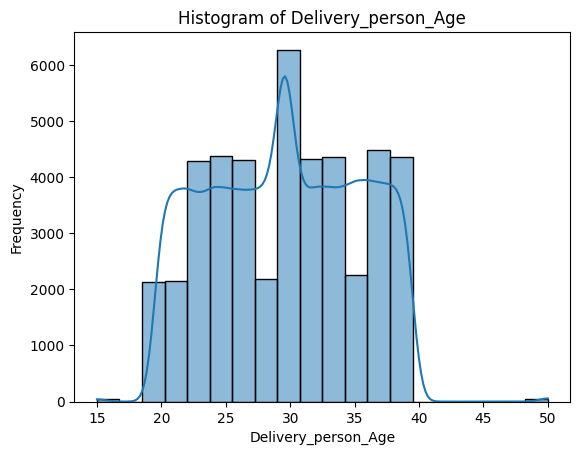

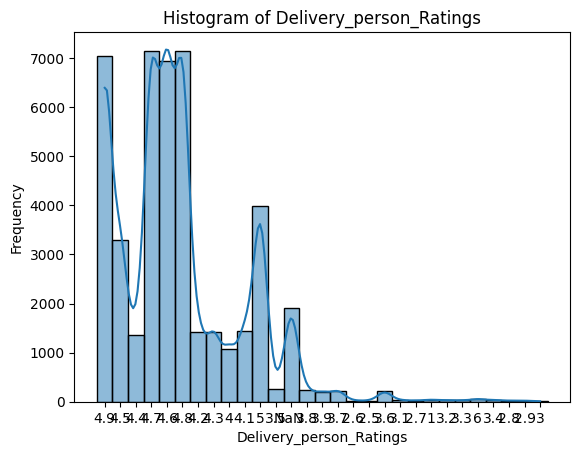

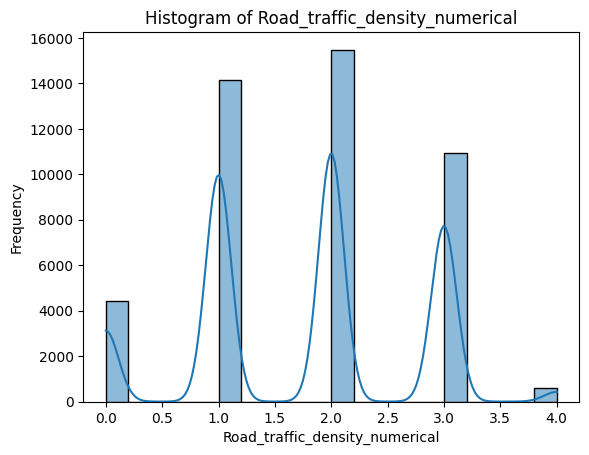

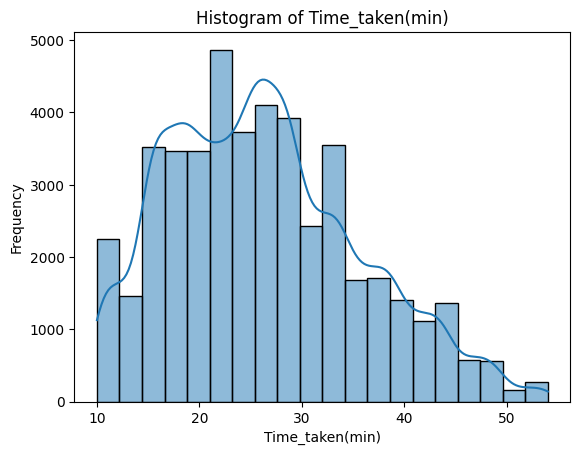

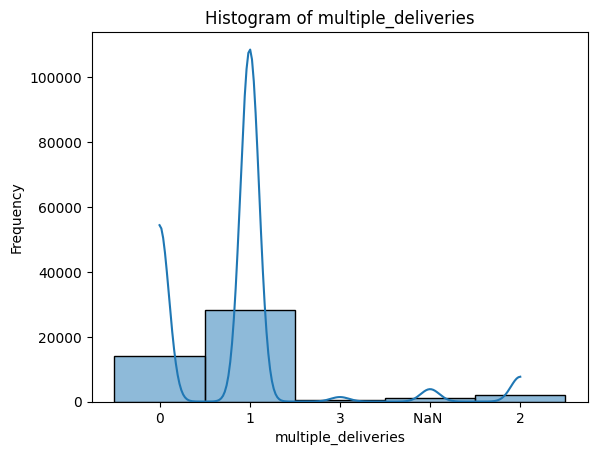

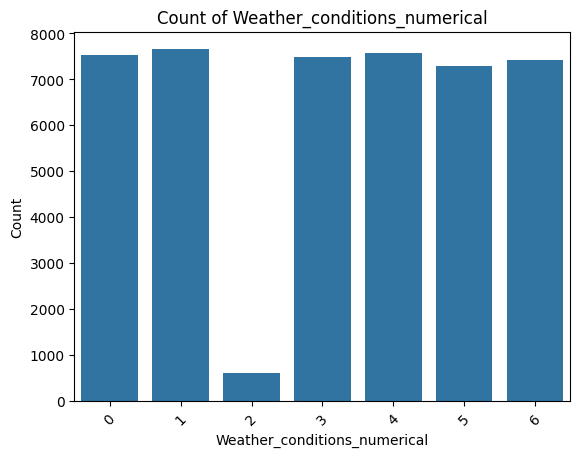

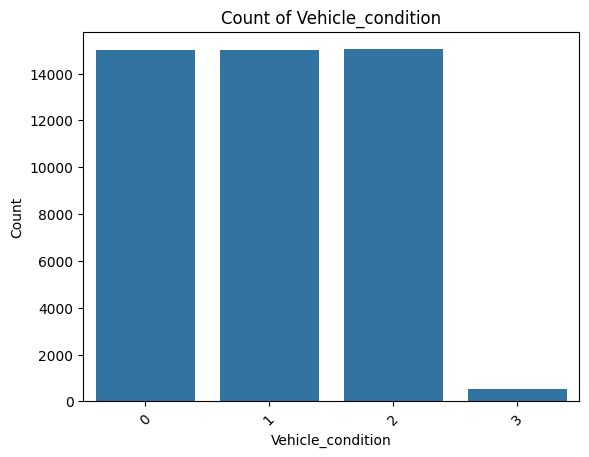

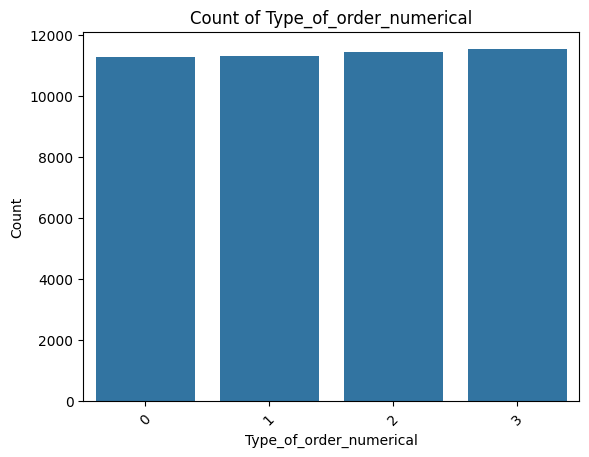

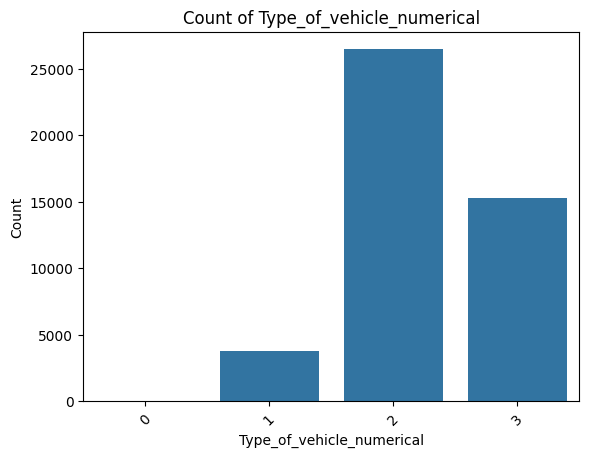

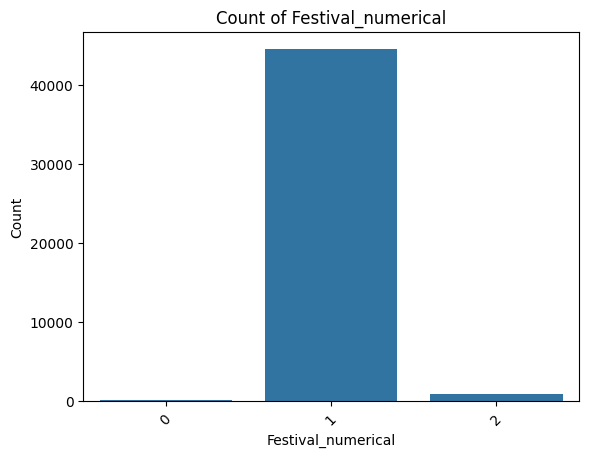

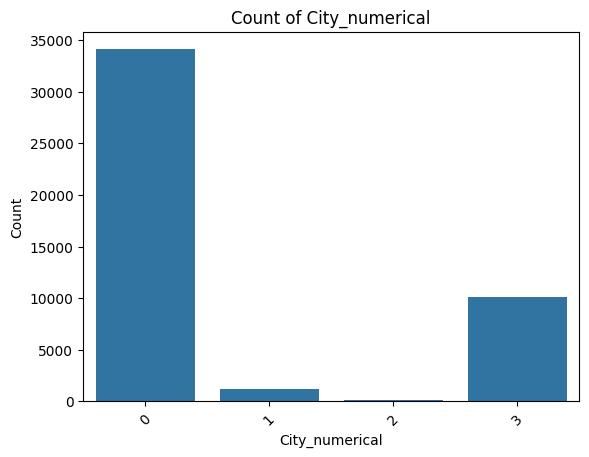

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the numerical features
numerical_features = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Road_traffic_density_numerical', 'Time_taken(min)','multiple_deliveries']

# Create histograms for numerical features
for feature in numerical_features:
    sns.histplot(df_train[feature], bins=20, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Define the categorical features
categorical_features = ['Weather_conditions_numerical', 'Vehicle_condition', 'Type_of_order_numerical', 'Type_of_vehicle_numerical', 'Festival_numerical', 'City_numerical']

# Create count plots for categorical features
for feature in categorical_features:
    sns.countplot(x=feature, data=df_train)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.show()

# If you have temporal features, you can create time series plots or seasonal decomposition plots as needed.


In [35]:
# Define the list of columns to be removed
columns_to_remove = ['Type_of_vehicle', 'Festival', 'City', 'Road_traffic_density']

# Remove the specified columns
df_train.drop(columns_to_remove, axis=1, inplace=True)


FINDING NULL VALUES

In [36]:

df_train.isnull().sum().sort_values(ascending=False)

ID                                0
Vehicle_condition                 0
City_numerical                    0
Festival_numerical                0
Type_of_vehicle_numerical         0
Type_of_order_numerical           0
Weather_conditions_numerical      0
City_code                         0
Time_taken(min)                   0
multiple_deliveries               0
Type_of_order                     0
Weather_conditions                0
Delivery_person_ID                0
Time_Order_picked                 0
Time_Orderd                       0
Order_Date                        0
Delivery_location_longitude       0
Delivery_location_latitude        0
Restaurant_longitude              0
Restaurant_latitude               0
Delivery_person_Ratings           0
Delivery_person_Age               0
Road_traffic_density_numerical    0
dtype: int64

In [37]:
# Define the list of columns to be removed
columns_to_remove = ['Type_of_order','Delivery_person_ID','Weather_conditions', 'City_code']

# Remove the specified columns
df_train.drop(columns_to_remove, axis=1, inplace=True)


In [38]:

df_train.isnull().sum().sort_values(ascending=False)

ID                                0
Vehicle_condition                 0
City_numerical                    0
Festival_numerical                0
Type_of_vehicle_numerical         0
Type_of_order_numerical           0
Weather_conditions_numerical      0
Time_taken(min)                   0
multiple_deliveries               0
Time_Order_picked                 0
Delivery_person_Age               0
Time_Orderd                       0
Order_Date                        0
Delivery_location_longitude       0
Delivery_location_latitude        0
Restaurant_longitude              0
Restaurant_latitude               0
Delivery_person_Ratings           0
Road_traffic_density_numerical    0
dtype: int64

### Handling outliers

In [39]:
df_train = df_train[~(df_train["Restaurant_latitude"] == 0)]\
    .reset_index(drop=True).copy()
df_train

,ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Vehicle_condition,multiple_deliveries,Time_taken(min),Weather_conditions_numerical,Type_of_order_numerical,Type_of_vehicle_numerical,Festival_numerical,City_numerical,Road_traffic_density_numerical
0,0x4607,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,2,0,24,5,3,2,1,3,0
1,0xb379,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,2,1,33,4,3,3,1,0,1
2,0x5d6d,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,0,1,26,3,1,2,1,3,2
3,0x7a6a,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,0,1,21,5,0,2,1,0,3
4,0x70a2,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,1,1,30,0,3,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41948,0x1178,35.0,4.2,23.371292,85.327872,23.481292,85.437872,08-03-2022,21:45:00,21:55:00,2,1,33,6,1,2,1,0,1
41949,0x7c09,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,1,0,32,6,2,2,1,0,0
41950,0x4f8d,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,1,0,16,0,1,3,1,0,2
41951,0x5eee,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,0,1,26,0,3,2,1,0,0


In [40]:
df_train = df_train[~(df_train["Delivery_location_latitude"] == 0)]\
    .reset_index(drop=True).copy()
df_train

,ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Vehicle_condition,multiple_deliveries,Time_taken(min),Weather_conditions_numerical,Type_of_order_numerical,Type_of_vehicle_numerical,Festival_numerical,City_numerical,Road_traffic_density_numerical
0,0x4607,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,2,0,24,5,3,2,1,3,0
1,0xb379,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,2,1,33,4,3,3,1,0,1
2,0x5d6d,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,0,1,26,3,1,2,1,3,2
3,0x7a6a,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,0,1,21,5,0,2,1,0,3
4,0x70a2,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,1,1,30,0,3,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41948,0x1178,35.0,4.2,23.371292,85.327872,23.481292,85.437872,08-03-2022,21:45:00,21:55:00,2,1,33,6,1,2,1,0,1
41949,0x7c09,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,1,0,32,6,2,2,1,0,0
41950,0x4f8d,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,1,0,16,0,1,3,1,0,2
41951,0x5eee,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,0,1,26,0,3,2,1,0,0


In [41]:
df_train = df_train[~(df_train["Restaurant_latitude"] < 7.00)]\
    .reset_index(drop=True).copy()
df_train

,ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Vehicle_condition,multiple_deliveries,Time_taken(min),Weather_conditions_numerical,Type_of_order_numerical,Type_of_vehicle_numerical,Festival_numerical,City_numerical,Road_traffic_density_numerical
0,0x4607,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,2,0,24,5,3,2,1,3,0
1,0xb379,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,2,1,33,4,3,3,1,0,1
2,0x5d6d,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,0,1,26,3,1,2,1,3,2
3,0x7a6a,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,0,1,21,5,0,2,1,0,3
4,0x70a2,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,1,1,30,0,3,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41517,0x1178,35.0,4.2,23.371292,85.327872,23.481292,85.437872,08-03-2022,21:45:00,21:55:00,2,1,33,6,1,2,1,0,1
41518,0x7c09,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,1,0,32,6,2,2,1,0,0
41519,0x4f8d,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,1,0,16,0,1,3,1,0,2
41520,0x5eee,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,0,1,26,0,3,2,1,0,0


### Kiểm tra xem một lần nữa dataset đã sạch chưa

In [42]:
for column in df_train.columns:
    print(column)
    print(df_train[column].value_counts())
    print("------------------------------------")

ID
ID
0x4607     1
0xa561     1
0xec3      1
0x639f     1
0xb7f9     1
          ..
0x221d     1
0x6e67     1
0xcda6     1
0x6a55     1
0x5fb2     1
Name: count, Length: 41522, dtype: int64
------------------------------------
Delivery_person_Age
Delivery_person_Age
35.000000    2093
36.000000    2070
37.000000    2042
30.000000    2036
24.000000    2035
22.000000    2021
38.000000    2018
33.000000    2010
29.000000    2007
32.000000    1999
28.000000    1997
34.000000    1986
25.000000    1984
26.000000    1980
39.000000    1968
27.000000    1966
21.000000    1961
20.000000    1955
31.000000    1936
23.000000    1933
29.567137    1476
15.000000      25
50.000000      24
Name: count, dtype: int64
------------------------------------
Delivery_person_Ratings
Delivery_person_Ratings
4.8     6535
4.7     6494
4.9     6455
4.6     6359
5       3649
4.5     3053
NaN     1515
4.2     1329
4.1     1320
4.3     1299
4.4     1243
4        994
3.5      236
3.8      215
3.7      202
3.6      193


# Data Visualization

In [43]:
df_train['Delivery_person_Age'] = df_train['Delivery_person_Age'].astype('float')

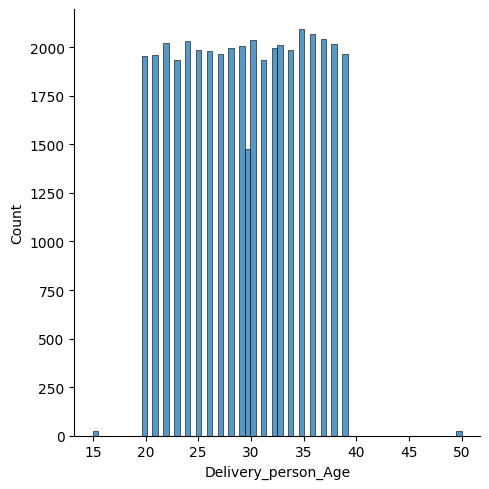

In [44]:
sns.displot(df_train['Delivery_person_Age'])

### Delivery_person_Ratings

In [45]:
df_train['Delivery_person_Ratings']=df_train['Delivery_person_Ratings'].astype('float64')

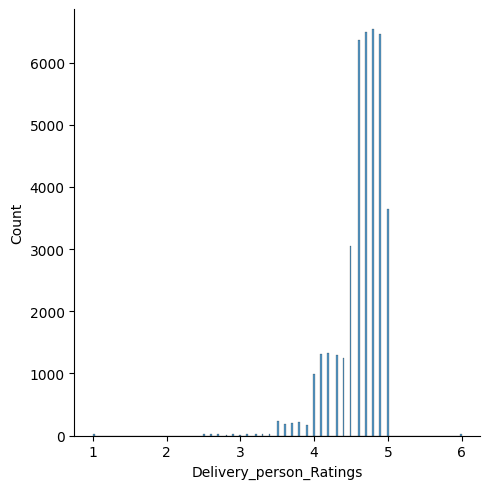

In [46]:
sns.displot(df_train['Delivery_person_Ratings'])

### Type_of_Order

<Axes: xlabel='Type_of_order_numerical', ylabel='count'>

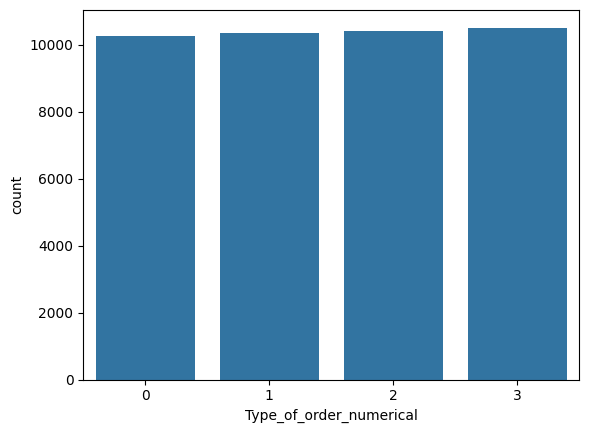

In [47]:
plt.figure(dpi=100)
sns.countplot(data=df_train,x='Type_of_order_numerical')


<Axes: xlabel='Type_of_vehicle_numerical', ylabel='count'>

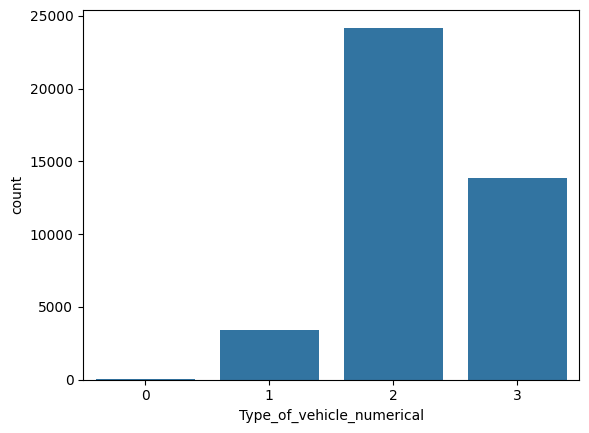

In [48]:
plt.figure(dpi=100)
sns.countplot(data=df_train,x='Type_of_vehicle_numerical')

<Axes: xlabel='Type_of_order_numerical', ylabel='count'>

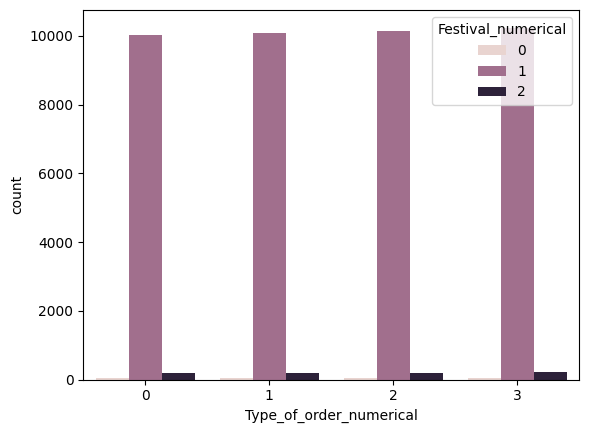

In [49]:
sns.countplot(x=df_train.Type_of_order_numerical,hue=df_train.Festival_numerical) #Festival doesn't affect the food ordering frequency

<Axes: xlabel='Time_taken(min)', ylabel='Density'>

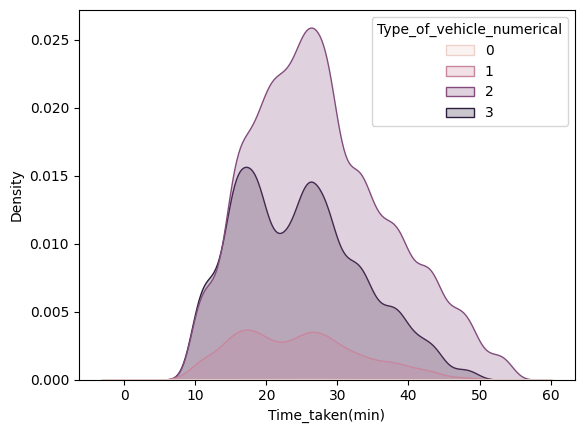

In [50]:
plt.figure(dpi=100)
sns.kdeplot(data=df_train,x='Time_taken(min)', hue='Type_of_vehicle_numerical', fill=True)
# most of the delivery is done through motorcylce and also have much higher mean delivery time compared to others

### Heatmap

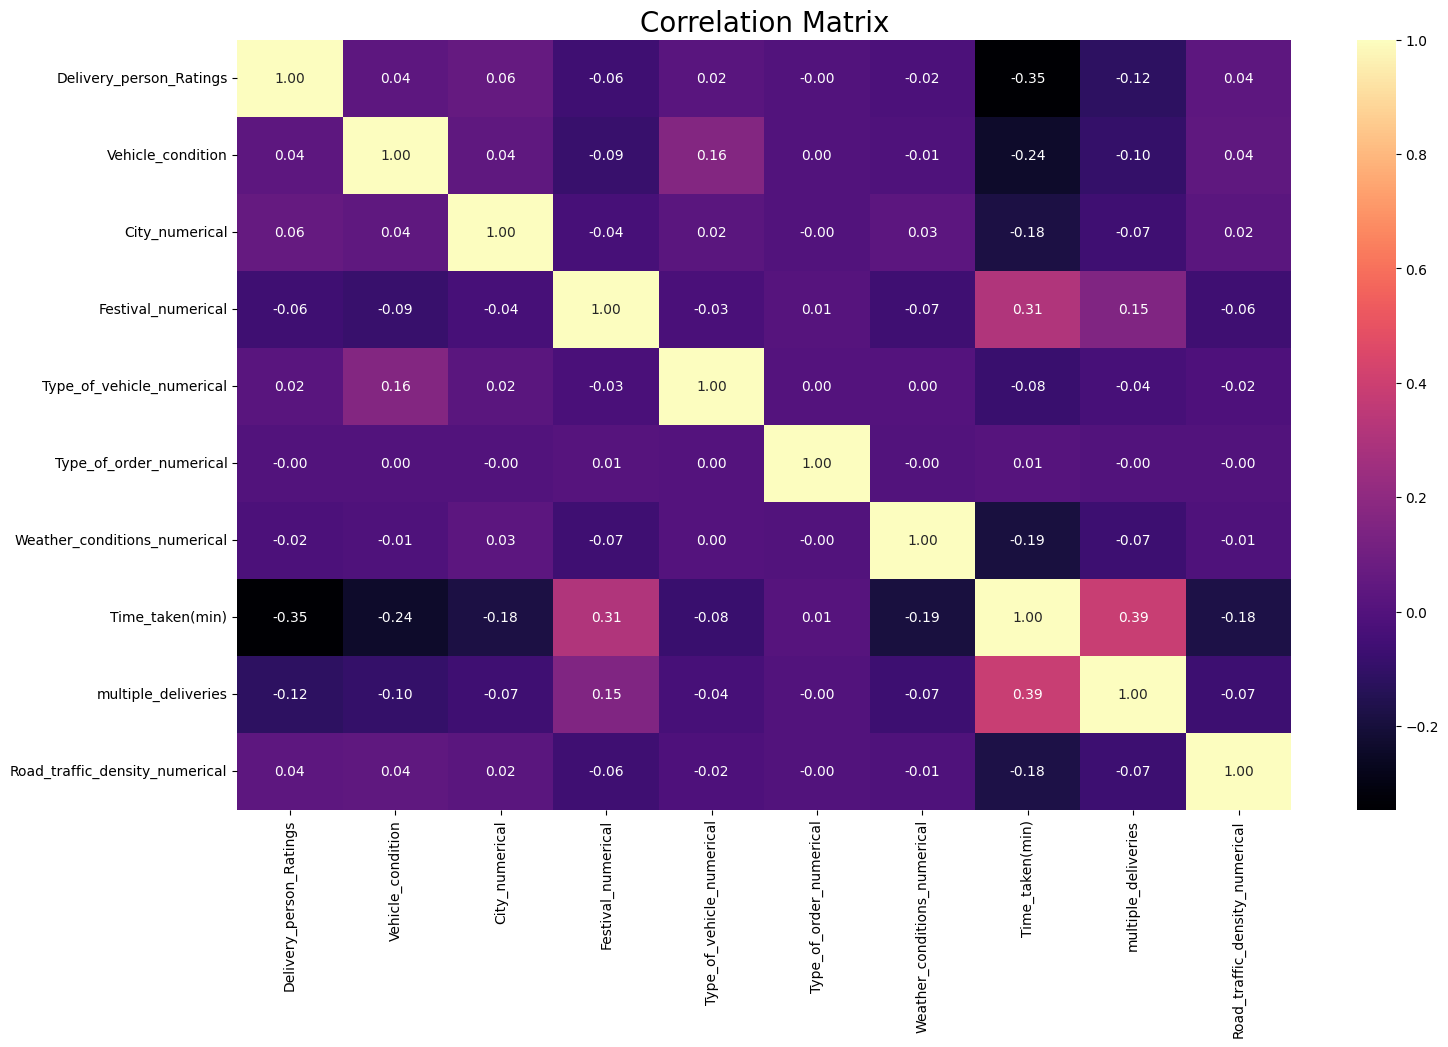

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the DataFrame columns you want to keep
features_to_keep = ['Delivery_person_Ratings', 'Vehicle_condition', 'City_numerical', 'Festival_numerical',
                    'Type_of_vehicle_numerical', 'Type_of_order_numerical', 'Weather_conditions_numerical',
                    'Time_taken(min)', 'multiple_deliveries', 'Road_traffic_density_numerical']

# Create the correlation matrix heatmap
f, ax = plt.subplots(figsize=[17, 10])
sns.heatmap(df_train[features_to_keep].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()


In [52]:
df_train

,ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Vehicle_condition,multiple_deliveries,Time_taken(min),Weather_conditions_numerical,Type_of_order_numerical,Type_of_vehicle_numerical,Festival_numerical,City_numerical,Road_traffic_density_numerical
0,0x4607,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,2,0,24,5,3,2,1,3,0
1,0xb379,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,2,1,33,4,3,3,1,0,1
2,0x5d6d,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,0,1,26,3,1,2,1,3,2
3,0x7a6a,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,0,1,21,5,0,2,1,0,3
4,0x70a2,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,1,1,30,0,3,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41517,0x1178,35.0,4.2,23.371292,85.327872,23.481292,85.437872,08-03-2022,21:45:00,21:55:00,2,1,33,6,1,2,1,0,1
41518,0x7c09,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,1,0,32,6,2,2,1,0,0
41519,0x4f8d,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,1,0,16,0,1,3,1,0,2
41520,0x5eee,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,0,1,26,0,3,2,1,0,0


In [53]:
features_to_keep

['Delivery_person_Ratings',
 'Vehicle_condition',
 'City_numerical',
 'Festival_numerical',
 'Type_of_vehicle_numerical',
 'Type_of_order_numerical',
 'Weather_conditions_numerical',
 'Time_taken(min)',
 'multiple_deliveries',
 'Road_traffic_density_numerical']

In [54]:
def extract_date_features(data):
    # Convert 'Order_Date' column to datetime format
    data['Order_Date'] = pd.to_datetime(data['Order_Date'])

    # Extract day of the month
    data["day"] = data.Order_Date.dt.day

    # Extract month of the year
    data["month"] = data.Order_Date.dt.month

    # Extract quarter of the year
    data["quarter"] = data.Order_Date.dt.quarter

    # Extract year
    data["year"] = data.Order_Date.dt.year

    # Extract day of the week (Monday=0, Sunday=6)
    data['day_of_week'] = data.Order_Date.dt.dayofweek.astype(int)

    # Extract whether it's the start of the month
    data["is_month_start"] = data.Order_Date.dt.is_month_start.astype(int)

    # Extract whether it's the end of the month
    data["is_month_end"] = data.Order_Date.dt.is_month_end.astype(int)

    # Extract whether it's the start of the quarter
    data["is_quarter_start"] = data.Order_Date.dt.is_quarter_start.astype(int)

    # Extract whether it's the end of the quarter
    data["is_quarter_end"] = data.Order_Date.dt.is_quarter_end.astype(int)

    # Extract whether it's the start of the year
    data["is_year_start"] = data.Order_Date.dt.is_year_start.astype(int)

    # Extract whether it's the end of the year
    data["is_year_end"] = data.Order_Date.dt.is_year_end.astype(int)

    # Identify whether it's a weekend (Friday or Saturday)
    data['is_weekend'] = np.where(data['day_of_week'].isin([5, 6]), 1, 0)

def calculate_time_diff(df):
    # Convert time columns to timedelta format, handle errors and NaN values
    df['Time_Orderd'] = pd.to_timedelta(df['Time_Orderd'], errors='coerce')
    df['Time_Order_picked'] = pd.to_timedelta(df['Time_Order_picked'], errors='coerce')

    # Calculate time difference and convert to minutes
    df['order_prepare_time'] = (df['Time_Order_picked'] - df['Time_Orderd']).dt.total_seconds() / 60

    # Handle null values by filling with median
    df['order_prepare_time'].fillna(df['order_prepare_time'].median(), inplace=True)

    # Drop unnecessary columns
    df.drop(['Time_Orderd', 'Time_Order_picked', 'Order_Date'], axis=1, inplace=True)

def calculate_distance(df):
    # Calculate distance between restaurant and delivery location
    restaurant_coordinates = df[['Restaurant_latitude', 'Restaurant_longitude']].to_numpy()
    delivery_location_coordinates = df[['Delivery_location_latitude', 'Delivery_location_longitude']].to_numpy()
    df['distance'] = np.array([geodesic(restaurant, delivery).meters for restaurant, delivery in zip(restaurant_coordinates, delivery_location_coordinates)])

def label_encoding(df):
    # Select categorical columns
    categorical_columns = df.select_dtypes(include='object').columns

    # Apply label encoding to categorical columns
    label_encoder = LabelEncoder()
    df[categorical_columns] = df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

# Apply functions to DataFrame
extract_date_features(df_train)
calculate_time_diff(df_train)
calculate_distance(df_train)
label_encoding(df_train)

print(df_train.head())

      ID  Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
0  10408                 37.0                      4.9            22.745049   
1  32542                 34.0                      4.5            12.913041   
2  15035                 23.0                      4.4            12.914264   
3  20908                 38.0                      4.7            11.003669   
4  18915                 32.0                      4.6            12.972793   

   Restaurant_longitude  Delivery_location_latitude  \
0             75.892471                   22.765049   
1             77.683237                   13.043041   
2             77.678400                   12.924264   
3             76.976494                   11.053669   
4             80.249982                   13.012793   

   Delivery_location_longitude  Vehicle_condition  multiple_deliveries  \
0                    75.912471                  2                    0   
1                    77.813237                

In [55]:
df_train

,ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken(min),Weather_conditions_numerical,Type_of_order_numerical,Type_of_vehicle_numerical,Festival_numerical,City_numerical,Road_traffic_density_numerical,day,month,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance
0,10408,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2,0,24,5,3,2,1,3,0,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,3020.736643
1,32542,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2,1,33,4,3,3,1,0,1,25,3,1,2022,4,0,0,0,0,0,0,0,5.0,20143.736910
2,15035,23.0,4.4,12.914264,77.678400,12.924264,77.688400,0,1,26,3,1,2,1,3,2,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,1549.692932
3,20908,38.0,4.7,11.003669,76.976494,11.053669,77.026494,0,1,21,5,0,2,1,0,3,5,4,2,2022,1,0,0,0,0,0,0,0,10.0,7774.496620
4,18915,32.0,4.6,12.972793,80.249982,13.012793,80.289982,1,1,30,0,3,3,1,0,0,26,3,1,2022,5,0,0,0,0,0,0,1,15.0,6197.897917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41517,275,35.0,4.2,23.371292,85.327872,23.481292,85.437872,2,1,33,6,1,2,1,0,1,8,3,1,2022,1,0,0,0,0,0,0,0,10.0,16576.799954
41518,21250,30.0,4.8,26.902328,75.794257,26.912328,75.804257,1,0,32,6,2,2,1,0,0,24,3,1,2022,3,0,0,0,0,0,0,0,10.0,1488.111648
41519,12272,30.0,4.9,13.022394,80.242439,13.052394,80.272439,1,0,16,0,1,3,1,0,2,11,3,1,2022,4,0,0,0,0,0,0,0,-1425.0,4648.024233
41520,15338,20.0,4.7,11.001753,76.986241,11.041753,77.026241,0,1,26,0,3,2,1,0,0,7,3,1,2022,0,0,0,0,0,0,0,0,5.0,6219.667685


day: Represents the day of the month extracted from the Order_Date column.**
month: Represents the month of the year extracted from the Order_Date column.**
quarter: Represents the quarter of the year extracted from the Order_Date column.**
year: Represents the year extracted from the Order_Date column.**
day_of_week: Represents the day of the week (Monday=0, Sunday=6) extracted from the Order_Date column.**
is_month_start: Indicates whether the date is the start of the month (1 if true, 0 otherwise).**
is_month_end: Indicates whether the date is the end of the month (1 if true, 0 otherwise).**
is_quarter_start: Indicates whether the date is the start of the quarter (1 if true, 0 otherwise).**
is_quarter_end: Indicates whether the date is the end of the quarter (1 if true, 0 otherwise).**
is_year_start: Indicates whether the date is the start of the year (1 if true, 0 otherwise).**
is_year_end: Indicates whether the date is the end of the year (1 if true, 0 otherwise).**
is_weekend: Indicates whether the day is a weekend (Friday or Saturday) (1 if true, 0 otherwise).**
order_prepare_time: Represents the time taken to prepare the order, calculated by subtracting Time_Orderd from Time_Order_picked and converting to minutes.**
distance: Represents the distance between the restaurant and the delivery location, calculated based on their coordinates.**

## Train test split

In [56]:
def label_encoding(df):
    categorical_columns = df.select_dtypes(include='object').columns
    label_encoder = LabelEncoder()
    df[categorical_columns] = df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

label_encoding(df_train)
df_train.head(8300)

,ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken(min),Weather_conditions_numerical,Type_of_order_numerical,Type_of_vehicle_numerical,Festival_numerical,City_numerical,Road_traffic_density_numerical,day,month,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance
0,10408,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2,0,24,5,3,2,1,3,0,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,3020.736643
1,32542,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2,1,33,4,3,3,1,0,1,25,3,1,2022,4,0,0,0,0,0,0,0,5.0,20143.736910
2,15035,23.0,4.4,12.914264,77.678400,12.924264,77.688400,0,1,26,3,1,2,1,3,2,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,1549.692932
3,20908,38.0,4.7,11.003669,76.976494,11.053669,77.026494,0,1,21,5,0,2,1,0,3,5,4,2,2022,1,0,0,0,0,0,0,0,10.0,7774.496620
4,18915,32.0,4.6,12.972793,80.249982,13.012793,80.289982,1,1,30,0,3,3,1,0,0,26,3,1,2022,5,0,0,0,0,0,0,1,15.0,6197.897917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8295,39059,38.0,5.0,27.157772,78.047250,27.167772,78.057250,0,0,27,5,2,2,1,0,2,15,2,1,2022,1,0,0,0,0,0,0,0,10.0,1486.643684
8296,16735,22.0,4.6,26.910262,75.783013,27.000262,75.873013,1,1,29,3,1,2,1,0,1,6,3,1,2022,6,0,0,0,0,0,0,1,5.0,13390.532026
8297,9139,37.0,4.8,12.975377,77.696664,13.055377,77.776664,0,1,26,4,0,2,1,0,2,12,3,1,2022,5,0,0,0,0,0,0,1,15.0,12395.256759
8298,28228,26.0,4.0,21.183434,72.814492,21.313434,72.944492,0,1,32,5,3,2,1,3,1,4,3,1,2022,4,0,0,0,0,0,0,0,5.0,19729.558573


In [57]:
train = df_train.loc[df_train.index < 33198]
test = df_train.loc[df_train.index >= 33198]

#Split features & label
X = df_train.drop('Time_taken(min)', axis=1)  # Features
y = df_train['Time_taken(min)']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(33217, 29)
(33217,)
(8305, 29)
(8305,)


## Standardization

In [58]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Perform normalization on the training data
X_train = scaler.transform(X_train)

# Perform normalization on the test data
X_test = scaler.transform(X_test)


# Model Building

In [59]:
import numpy as np

# Find the mean values of each column
mean_values = np.nanmean(X_train, axis=0)

# Replace NaN values with the mean values of the respective columns
X_train = np.where(np.isnan(X_train), mean_values, X_train)


In [60]:
import numpy as np

# Check for null or NaN values in X_train
null_values = np.isnan(X_train).sum(axis=0)

# Print the columns along with their counts of null or NaN values
print(null_values)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [61]:
from sklearn.model_selection import train_test_split

# Assuming X_train and y_train are your feature matrix and target vector
# Replace X_train and y_train with your actual data

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of train and test sets
print("Training set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nTesting set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


Training set shapes:
X_train: (26573, 29)
y_train: (26573,)

Testing set shapes:
X_test: (6644, 29)
y_test: (6644,)


In [62]:
X_train

array([[-1.88272592e-01,  9.53213432e-01, -1.61067700e+00, ...,
         1.62955265e+00,  1.39227364e-01,  7.26587258e-01],
       [ 9.08761233e-01, -1.68094318e+00,  5.07786733e-01, ...,
         1.62955265e+00,  1.64728684e-01,  1.65376242e-01],
       [-6.99220994e-01, -9.78501414e-01,  2.05149057e-01, ...,
        -6.13665352e-01,  1.64728684e-01,  4.81880474e-01],
       ...,
       [-1.38170593e-04,  4.26382111e-01, -9.74886184e-02, ...,
        -6.13665352e-01,  1.39227364e-01,  1.98954843e+00],
       [ 1.54763437e+00,  6.01992551e-01, -1.91331467e+00, ...,
         1.62955265e+00,  1.64728684e-01, -3.96872081e-01],
       [-3.14529468e-01, -9.78501414e-01, -4.00126294e-01, ...,
        -6.13665352e-01,  1.13726044e-01, -9.64832046e-02]])

**BUILDING AND COMPARISION OF MODELS**

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

# Assuming X_train, X_test, y_train, y_test are your feature matrix and target vector
# Replace X_train, X_test, y_train, y_test with your actual data

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# List of regression models
models = [
    LinearRegression(),
    Lasso(alpha=0.1),
    Ridge(alpha=1.0),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(kernel='linear'),
    KNeighborsRegressor(n_neighbors=5),
    xgb.XGBRegressor()
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model.__class__.__name__} MSE: {mse}")



LinearRegression MSE: 44.66175233769472
Lasso MSE: 44.69015702593709
Ridge MSE: 44.67155143874805
DecisionTreeRegressor MSE: 30.653057384760114
RandomForestRegressor MSE: 16.100720846660398
SVR MSE: 45.06065229447959
KNeighborsRegressor MSE: 42.71831420507997
XGBRegressor MSE: 16.652808288489435


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
import xgboost as xgb
import numpy as np

# Assuming X_train, X_test, y_train, y_test are your feature matrix and target vector
# Replace X_train, X_test, y_train, y_test with your actual data

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# List of regression models
models = [
    LinearRegression(),
    Lasso(alpha=0.1),
    Ridge(alpha=1.0),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(kernel='linear'),
    KNeighborsRegressor(n_neighbors=5),
    xgb.XGBRegressor()
]

# Train and evaluate each model with PCA-transformed data
for model in models:
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model.__class__.__name__} with PCA - MSE: {mse}, R2 Score: {r2}")


LinearRegression with PCA - MSE: 44.23347676765657, R2 Score: 0.487942822830259
Lasso with PCA - MSE: 44.40797273787296, R2 Score: 0.48592281625456446
Ridge with PCA - MSE: 44.23345317528524, R2 Score: 0.4879430959411232
DecisionTreeRegressor with PCA - MSE: 69.08160865475071, R2 Score: 0.20029497776305039
RandomForestRegressor with PCA - MSE: 33.07744369708373, R2 Score: 0.617087697255025
SVR with PCA - MSE: 44.50364004909615, R2 Score: 0.48481534885855404
KNeighborsRegressor with PCA - MSE: 41.56690498588899, R2 Score: 0.5188116877504771
XGBRegressor with PCA - MSE: 32.06787710174722, R2 Score: 0.6287746786715722


### Cross Validation

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

# Assuming X_train, X_test, y_train, y_test are your feature matrix and target vector
# Replace X_train, X_test, y_train, y_test with your actual data

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# List of regression models
models = [
    LinearRegression(),
    Lasso(alpha=0.1),
    Ridge(alpha=1.0),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(kernel='linear'),
    KNeighborsRegressor(n_neighbors=5),
    xgb.XGBRegressor()
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model.__class__.__name__} MSE: {mse}, R2 Score: {r2}")


LinearRegression MSE: 46.17684616930468, R2 Score: 0.48156157236163
Lasso MSE: 46.358160365987764, R2 Score: 0.4795259147792077
Ridge MSE: 46.19581117774998, R2 Score: 0.48134864770405417
DecisionTreeRegressor MSE: 30.92445620223398, R2 Score: 0.6528037798364168
RandomForestRegressor MSE: 16.241948353909464, R2 Score: 0.8176477853097339
SVR MSE: 46.55217677047973, R2 Score: 0.47734764649054906
KNeighborsRegressor MSE: 45.82567901234569, R2 Score: 0.4855042095011295
XGBRegressor MSE: 17.389025745664892, R2 Score: 0.8047692747856325


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import numpy as np

# Assuming X_train, X_test, y_train, y_test are your feature matrix and target vector
# Replace X_train, X_test, y_train, y_test with your actual data

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create a XGB regressor model
model = xgb.XGBRegressor(n_estimators=20, max_depth=9)

# Fit the model on the training data
model.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_test, y_test)],
          verbose=True)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R-squared (R2) Score:", round(r2, 2))


[0]	validation_0-rmse:7.13674	validation_1-rmse:7.16867
[1]	validation_0-rmse:5.68665	validation_1-rmse:5.81314
[2]	validation_0-rmse:4.80323	validation_1-rmse:5.02261
[3]	validation_0-rmse:4.23924	validation_1-rmse:4.57669
[4]	validation_0-rmse:3.88983	validation_1-rmse:4.34365
[5]	validation_0-rmse:3.63176	validation_1-rmse:4.20136


[6]	validation_0-rmse:3.45601	validation_1-rmse:4.11160
[7]	validation_0-rmse:3.33190	validation_1-rmse:4.06935
[8]	validation_0-rmse:3.19043	validation_1-rmse:4.04890
[9]	validation_0-rmse:3.06970	validation_1-rmse:4.04945
[10]	validation_0-rmse:2.93947	validation_1-rmse:4.05244
[11]	validation_0-rmse:2.86515	validation_1-rmse:4.05286
[12]	validation_0-rmse:2.82402	validation_1-rmse:4.04917
[13]	validation_0-rmse:2.77277	validation_1-rmse:4.06288
[14]	validation_0-rmse:2.71444	validation_1-rmse:4.07545
[15]	validation_0-rmse:2.68072	validation_1-rmse:4.07961
[16]	validation_0-rmse:2.65299	validation_1-rmse:4.07891
[17]	validation_0-rmse:2.59801	validation_1-rmse:4.08721
[18]	validation_0-rmse:2.53974	validation_1-rmse:4.09586
[19]	validation_0-rmse:2.50484	validation_1-rmse:4.09814
Mean Absolute Error (MAE): 3.26
Mean Squared Error (MSE): 16.79
Root Mean Squared Error (RMSE): 4.1
R-squared (R2) Score: 0.81


In [67]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (10883, 29)
Shape of y_train: (10883,)


In [68]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Create an instance of the ElasticNet model
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Fit the model on the training data
elasticnet_model.fit(X_train, y_train)

# Make predictions on the test data
elasticnet_predictions = elasticnet_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, elasticnet_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, elasticnet_predictions)
mae = mean_absolute_error(y_test, elasticnet_predictions)

print("ElasticNet Regression Metrics:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)
print("MAE:", mae)


ElasticNet Regression Metrics:
MSE: 44.67414733056679
RMSE: 6.683872180896848
R2 Score: 0.48452492082347765
MAE: 5.369822952395117


In [69]:
from sklearn.neural_network import MLPRegressor

# Create an instance of the MLPRegressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500)

# Fit the model on the training data
mlp_model.fit(X_train, y_train)

# Make predictions on the test data
mlp_predictions = mlp_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, mlp_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, mlp_predictions)
mae = mean_absolute_error(y_test, mlp_predictions)

print("Neural Networks (Multi-layer Perceptron) Metrics:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)
print("MAE:", mae)


Neural Networks (Multi-layer Perceptron) Metrics:
MSE: 32.93649712309305
RMSE: 5.739032768950971
R2 Score: 0.619960436251973
MAE: 4.607461366128369


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

# Assuming X_train, X_test, y_train, y_test are your feature matrix and target vector
# Replace X_train, X_test, y_train, y_test with your actual data

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# List of regression models
models = [
    LinearRegression(),
    Lasso(alpha=0.1),
    Ridge(alpha=1.0),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(kernel='linear'),
    KNeighborsRegressor(n_neighbors=5),
    xgb.XGBRegressor()
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate MAE
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)

    # Calculate RMSE
    rmse = np.sqrt(mse)

    # Calculate R2 score
    r2 = r2_score(y_test, y_pred)

    # Print model name and metrics
    print(f"{model.__class__.__name__} Metrics:")
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Score:", r2)
    print()


LinearRegression Metrics:
MAE: 5.493679034985388
MSE: 46.668678938111
RMSE: 6.831447792240748
R2 Score: 0.4645488044878049

Lasso Metrics:
MAE: 5.489163465096802
MSE: 46.57423114573639
RMSE: 6.824531569692999
R2 Score: 0.46563244740402154

Ridge Metrics:
MAE: 5.488732523987003
MSE: 46.60788612856324
RMSE: 6.826996860154781
R2 Score: 0.46524630832317304

DecisionTreeRegressor Metrics:
MAE: 4.259072117593018
MSE: 32.57877813504823
RMSE: 5.70778224313509
R2 Score: 0.626208710045731

RandomForestRegressor Metrics:
MAE: 3.2817225539733577
MSE: 17.409623840146992
RMSE: 4.172484133001226
R2 Score: 0.8002513867815594

SVR Metrics:
MAE: 5.463783103699275
MSE: 46.883589980899316
RMSE: 6.847159263585105
R2 Score: 0.462083031352414

KNeighborsRegressor Metrics:
MAE: 5.525034451079467
MSE: 48.6593661001378
RMSE: 6.975626574017405
R2 Score: 0.4417087360510793

XGBRegressor Metrics:
MAE: 3.372361826469551
MSE: 18.318692488335724
RMSE: 4.280034169061706
R2 Score: 0.7898212245067535



LinearRegression Metrics:
MAE: 5.504154726335437
MSE: 46.34339806900209
RMSE: 6.807598553748751
R2 Score: 0.46864574447230944

Bootstrap Uncertainty - MSE:
Mean: 46.51138734088518
Standard Deviation: 0.42965031939284776

Bootstrap Uncertainty - R2 Score:
Mean: 0.46671964888550826
Standard Deviation: 0.004926193052531528



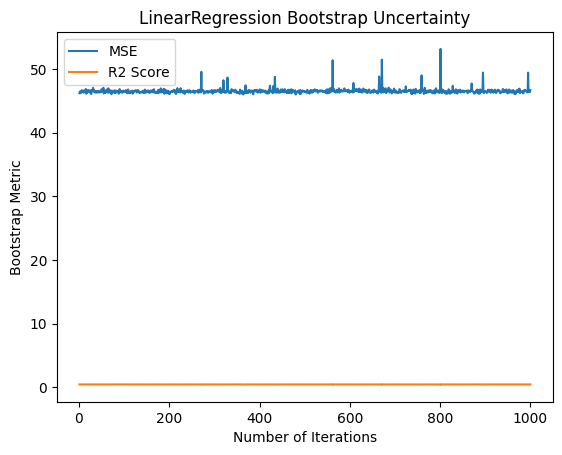

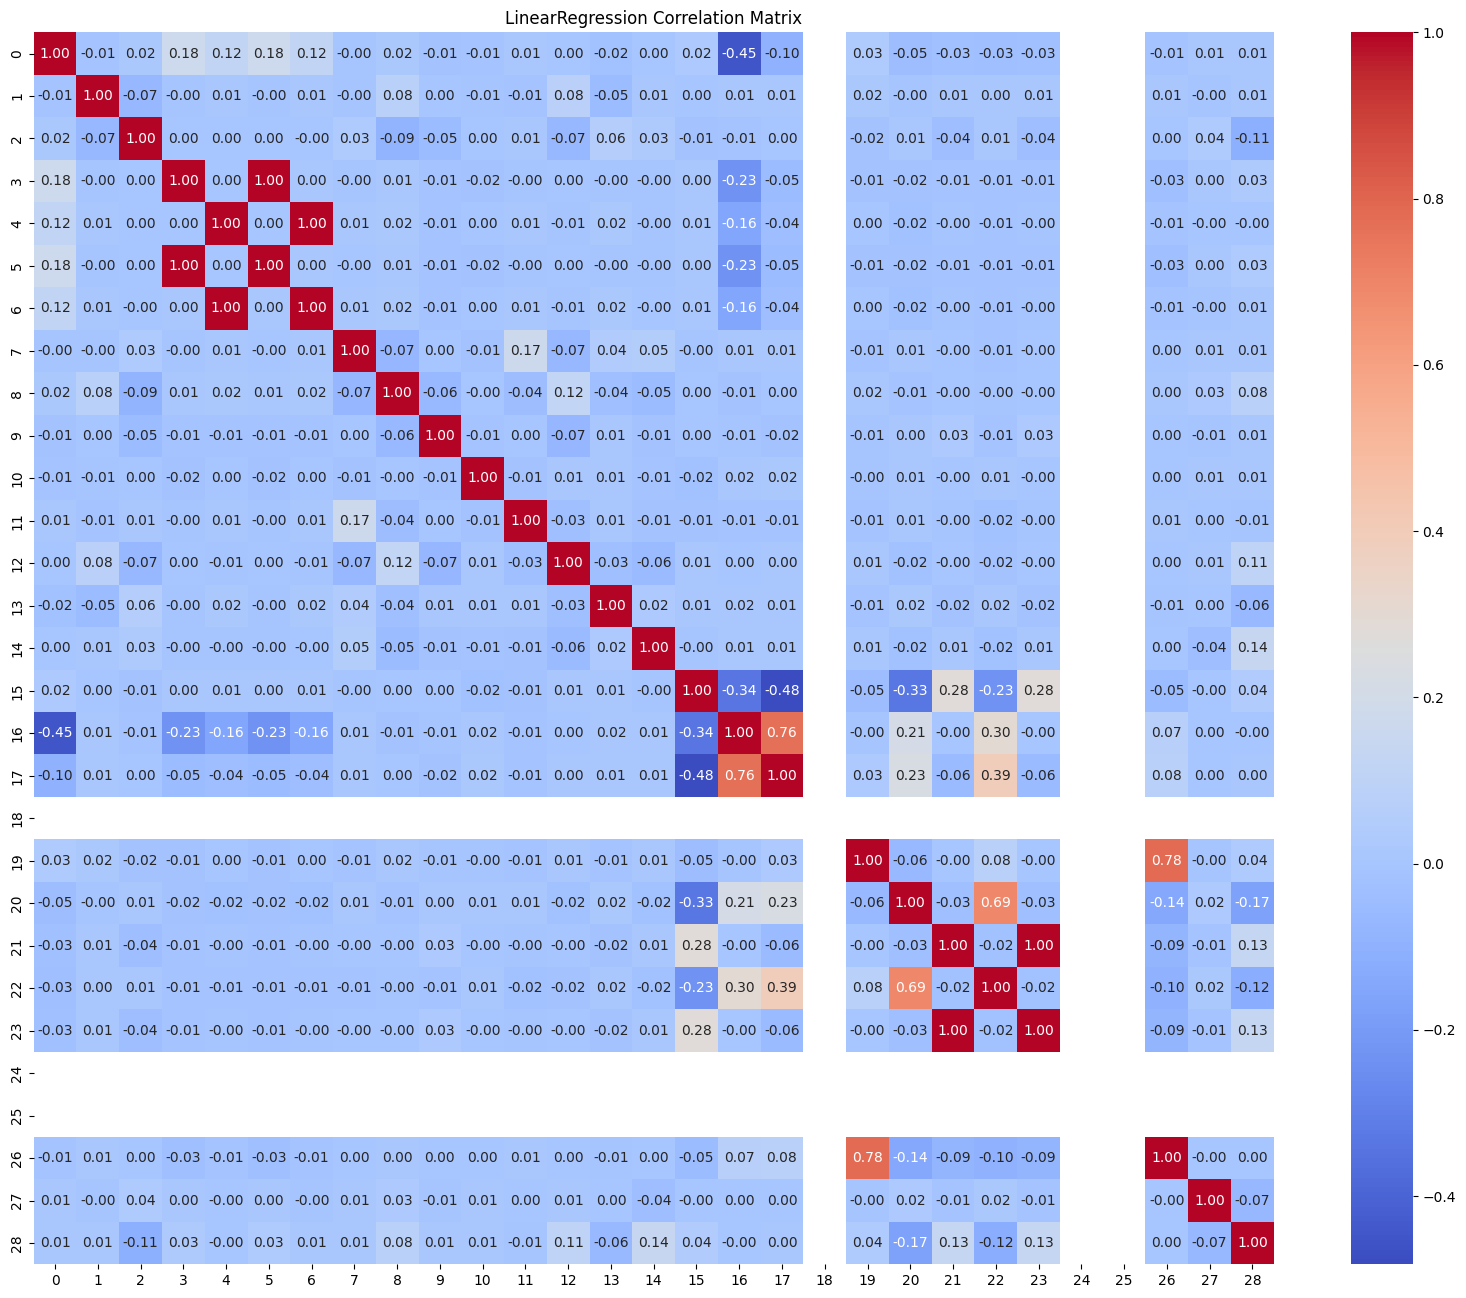

Lasso Metrics:
MAE: 5.515401136756589
MSE: 46.40750001174052
RMSE: 6.812305043943681
R2 Score: 0.4679107780805283

Bootstrap Uncertainty - MSE:
Mean: 46.50690431314941
Standard Deviation: 0.17613941247623774

Bootstrap Uncertainty - R2 Score:
Mean: 0.4667710494293679
Standard Deviation: 0.002019541731619324



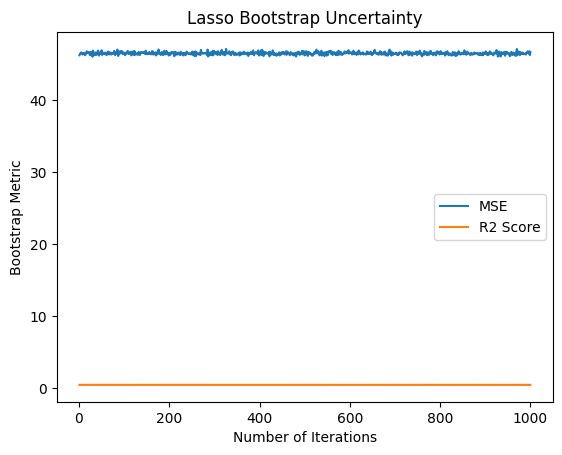

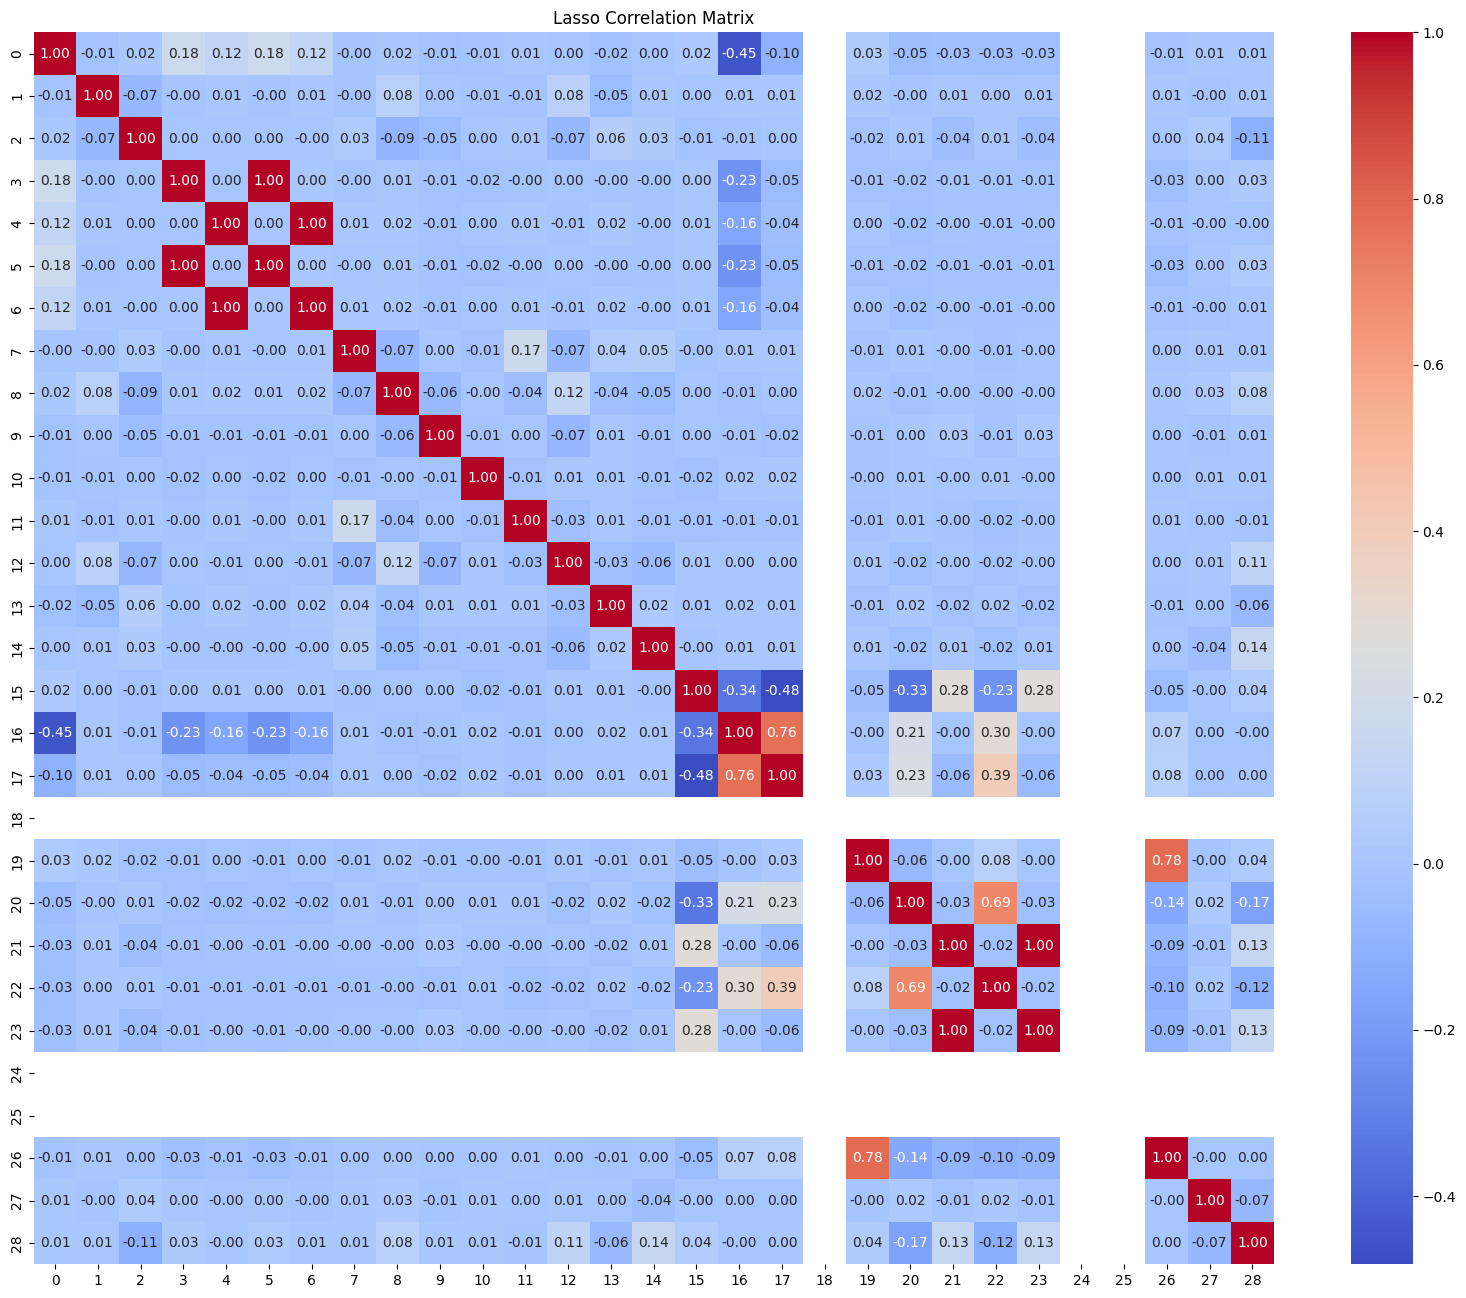

Ridge Metrics:
MAE: 5.506775805837046
MSE: 46.35449759677534
RMSE: 6.808413735722539
R2 Score: 0.4685184818726209

Bootstrap Uncertainty - MSE:
Mean: 46.511397821891244
Standard Deviation: 0.19314870745664506

Bootstrap Uncertainty - R2 Score:
Mean: 0.4667195287146229
Standard Deviation: 0.0022145632804903923



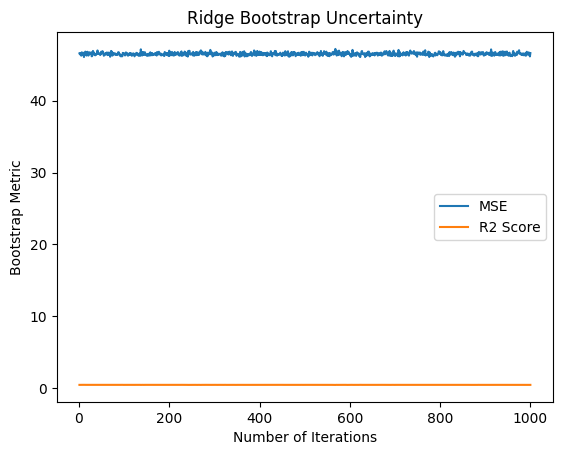

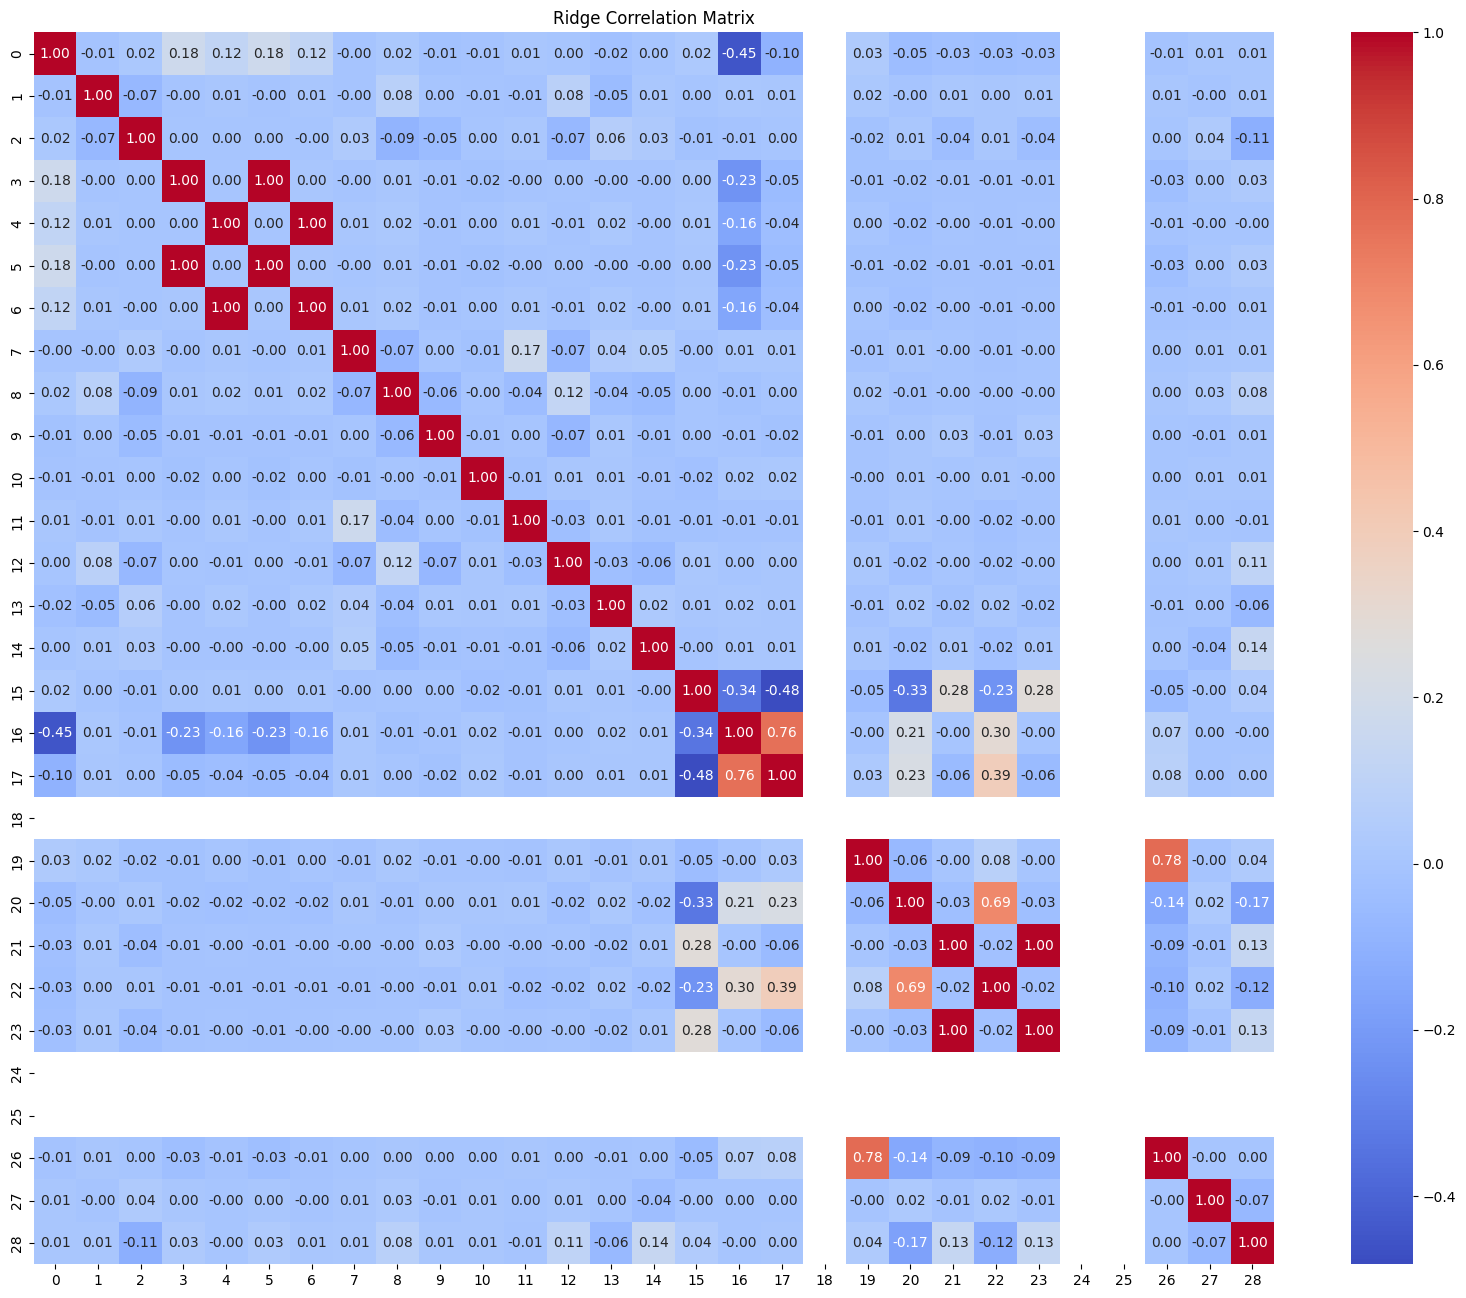

DecisionTreeRegressor Metrics:
MAE: 4.106773823191734
MSE: 29.918484500574053
RMSE: 5.46977920034932
R2 Score: 0.6569670175102551

Bootstrap Uncertainty - MSE:
Mean: 36.11531056257175
Standard Deviation: 1.5972921377011606

Bootstrap Uncertainty - R2 Score:
Mean: 0.5859167700962703
Standard Deviation: 0.018313891731131512



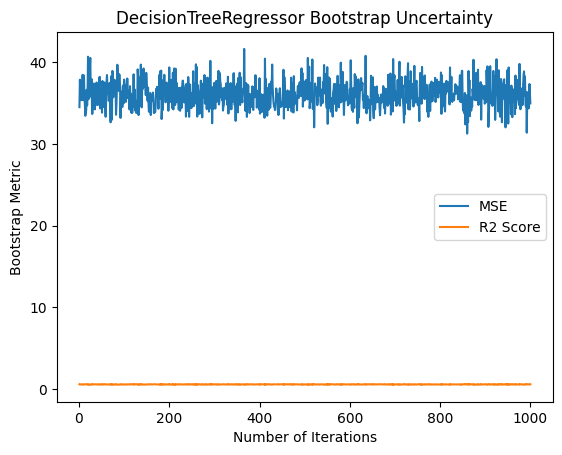

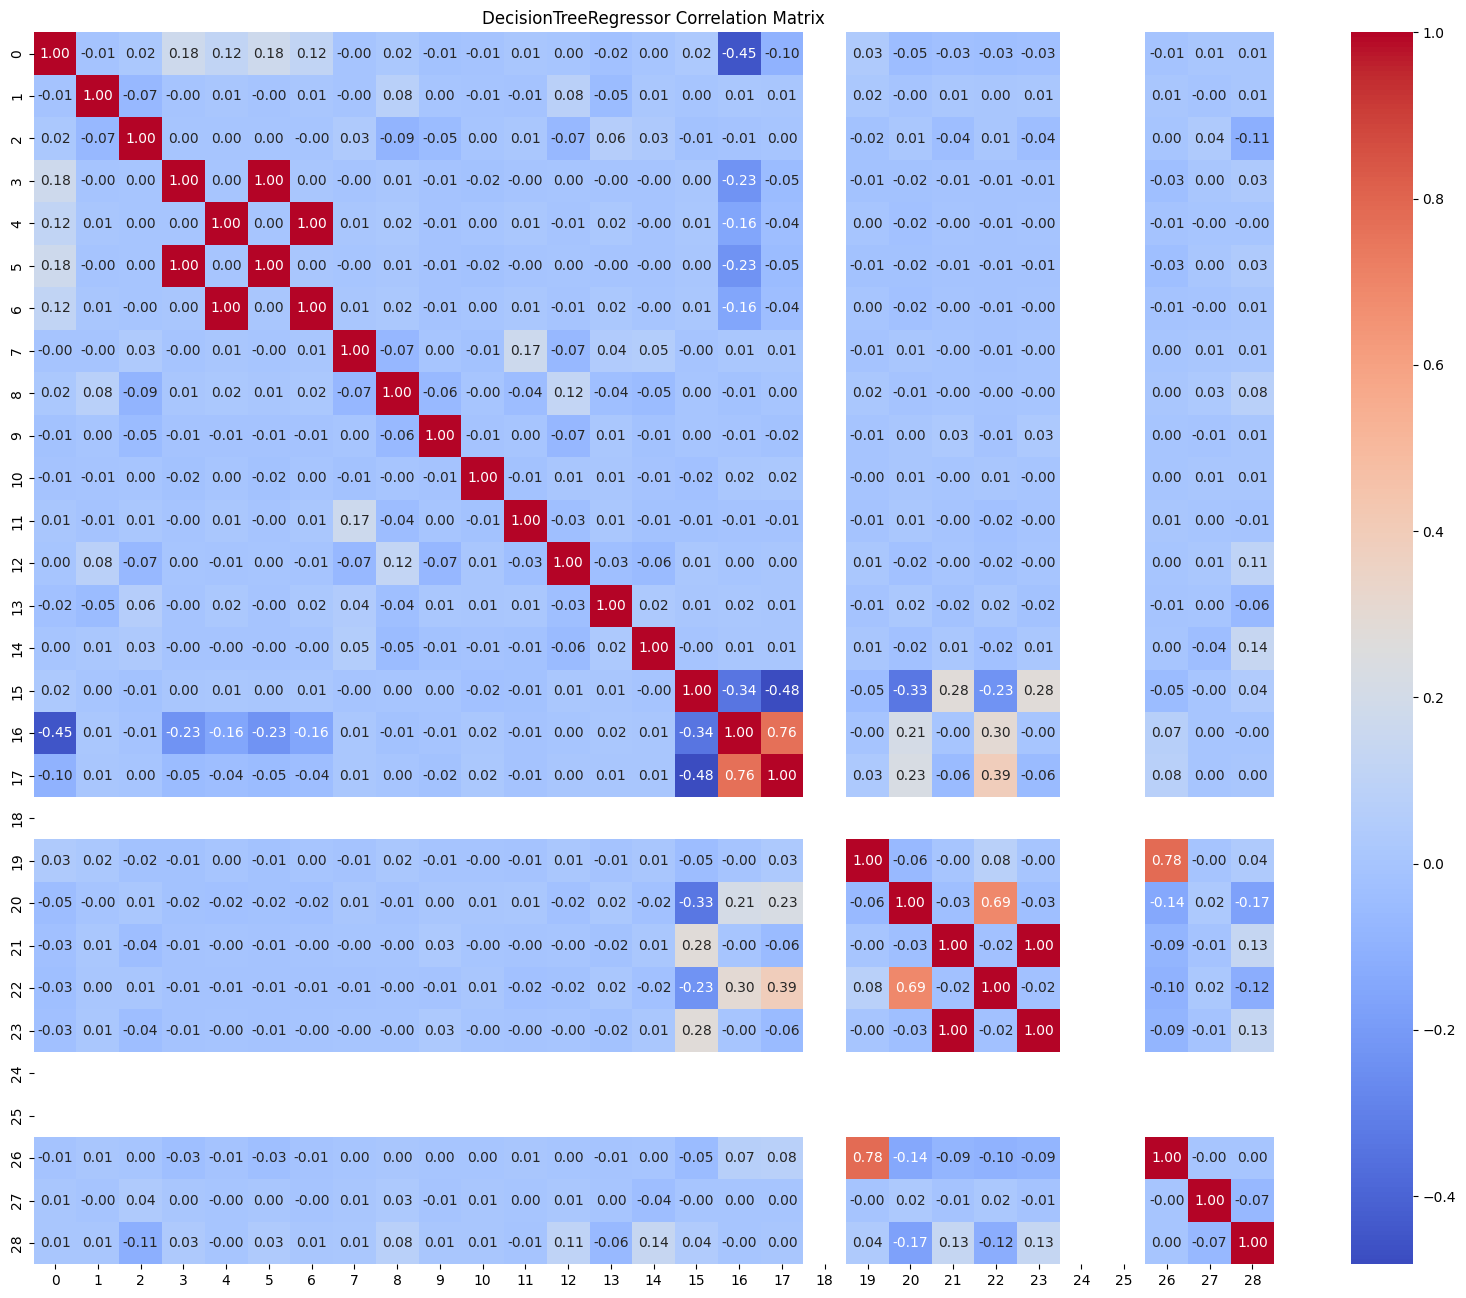

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming X_train, X_test, y_train, y_test are your feature matrix and target vector
# Replace X_train, X_test, y_train, y_test with your actual data

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# List of regression models
models = [
    LinearRegression(),
    Lasso(alpha=0.1),
    Ridge(alpha=1.0),
    DecisionTreeRegressor(),
    #RandomForestRegressor(),
    #SVR(kernel='linear'),
    #KNeighborsRegressor(n_neighbors=5),
    #xgb.XGBRegressor()
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate MAE
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)

    # Calculate RMSE
    rmse = np.sqrt(mse)

    # Calculate R2 score
    r2 = r2_score(y_test, y_pred)

    # Print model name and metrics
    print(f"{model.__class__.__name__} Metrics:")
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Score:", r2)
    print()

    # Bootstrap uncertainty estimation
    n_iterations = 1000  # Number of bootstrap iterations
    bootstrap_mse = []
    bootstrap_r2 = []

    for _ in range(n_iterations):
        X_boot, y_boot = resample(X_train, y_train)
        model.fit(X_boot, y_boot)
        y_pred_boot = model.predict(X_test)

        # Calculate MSE and R2 for bootstrapped sample
        mse_boot = mean_squared_error(y_test, y_pred_boot)
        r2_boot = r2_score(y_test, y_pred_boot)

        bootstrap_mse.append(mse_boot)
        bootstrap_r2.append(r2_boot)

    # Calculate mean and standard deviation of bootstrap MSE and R2
    mse_mean = np.mean(bootstrap_mse)
    mse_std = np.std(bootstrap_mse)
    r2_mean = np.mean(bootstrap_r2)
    r2_std = np.std(bootstrap_r2)

    print("Bootstrap Uncertainty - MSE:")
    print("Mean:", mse_mean)
    print("Standard Deviation:", mse_std)
    print()

    print("Bootstrap Uncertainty - R2 Score:")
    print("Mean:", r2_mean)
    print("Standard Deviation:", r2_std)
    print()

    # Plot Bootstrap Accuracy vs. Number of Iterations
    plt.plot(range(1, n_iterations + 1), bootstrap_mse, label='MSE')
    plt.plot(range(1, n_iterations + 1), bootstrap_r2, label='R2 Score')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Bootstrap Metric")
    plt.title(f"{model.__class__.__name__} Bootstrap Uncertainty")
    plt.legend()
    plt.show()

    # Convert NumPy arrays to pandas DataFrames
    X_train_df = pd.DataFrame(X_train)

    # Plot correlation matrix
    corr = X_train_df.corr()
    plt.figure(figsize=(20, 16))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"{model.__class__.__name__} Correlation Matrix")
    plt.show()


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import pandas as pd

# Assuming X_train, X_test, y_train, y_test are your feature matrix and target vector
# Replace X_train, X_test, y_train, y_test with your actual data

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# List of regression models
models = [
    LinearRegression(),
    Lasso(alpha=0.1),
    Ridge(alpha=1.0),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(kernel='linear'),
    KNeighborsRegressor(n_neighbors=5),
    xgb.XGBRegressor()
]

# Initialize lists to store model metrics
model_names = []
mae_values = []
mse_values = []
rmse_values = []
r2_values = []

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store metrics in lists
    model_names.append(model.__class__.__name__)
    mae_values.append(mae)
    mse_values.append(mse)
    rmse_values.append(rmse)
    r2_values.append(r2)

# Create a DataFrame to compare results
results_df = pd.DataFrame({
    'Model': model_names,
    'MAE': mae_values,
    'MSE': mse_values,
    'RMSE': rmse_values,
    'R2 Score': r2_values
})

# Print the results DataFrame
print("Results in Tabular Format:")
print(results_df)


Results in Tabular Format:
                   Model       MAE        MSE      RMSE  R2 Score
0       LinearRegression  5.446621  45.336396  6.733231  0.486708
1                  Lasso  5.463126  45.506089  6.745820  0.484787
2                  Ridge  5.453951  45.430645  6.740226  0.485641
3  DecisionTreeRegressor  4.567839  36.715721  6.059350  0.584310
4  RandomForestRegressor  3.340689  18.619837  4.315071  0.789189
5                    SVR  5.434371  46.106879  6.790205  0.477985
6    KNeighborsRegressor  5.551184  50.333955  7.094643  0.430127
7           XGBRegressor  3.416080  18.890930  4.346370  0.786120


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import numpy as np

# Assuming X_train, X_test, y_train, y_test are your feature matrix and target vector
# Replace X_train, X_test, y_train, y_test with your actual data

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create a XGB regressor model
model = xgb.XGBRegressor(n_estimators=20, max_depth=9)

# Fit the model on the training data
model.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_test, y_test)],
          verbose=True)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R-squared (R2) Score:", round(r2, 2))


[0]	validation_0-rmse:7.08191	validation_1-rmse:7.42674
[1]	validation_0-rmse:5.55871	validation_1-rmse:6.12204
[2]	validation_0-rmse:4.55589	validation_1-rmse:5.35411
[3]	validation_0-rmse:3.91595	validation_1-rmse:4.88005
[4]	validation_0-rmse:3.49596	validation_1-rmse:4.64095
[5]	validation_0-rmse:3.20888	validation_1-rmse:4.49072


[6]	validation_0-rmse:3.00228	validation_1-rmse:4.38706
[7]	validation_0-rmse:2.82951	validation_1-rmse:4.35770
[8]	validation_0-rmse:2.68454	validation_1-rmse:4.32396
[9]	validation_0-rmse:2.57850	validation_1-rmse:4.30018
[10]	validation_0-rmse:2.41383	validation_1-rmse:4.28330
[11]	validation_0-rmse:2.29608	validation_1-rmse:4.29156
[12]	validation_0-rmse:2.14197	validation_1-rmse:4.30284
[13]	validation_0-rmse:2.11058	validation_1-rmse:4.30969
[14]	validation_0-rmse:2.03947	validation_1-rmse:4.31587
[15]	validation_0-rmse:1.99118	validation_1-rmse:4.32039
[16]	validation_0-rmse:1.91661	validation_1-rmse:4.32146
[17]	validation_0-rmse:1.85174	validation_1-rmse:4.33583
[18]	validation_0-rmse:1.82707	validation_1-rmse:4.33770
[19]	validation_0-rmse:1.73729	validation_1-rmse:4.33672
Mean Absolute Error (MAE): 3.37
Mean Squared Error (MSE): 18.81
Root Mean Squared Error (RMSE): 4.34
R-squared (R2) Score: 0.79


In [74]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# Assuming X_train, X_test, y_train, y_test are your feature matrix and target vector
# Replace X_train, X_test, y_train, y_test with your actual data

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create a XGB regressor model
model = xgb.XGBRegressor(n_estimators=20, max_depth=9)

# Fit the model on the training data
model.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_test, y_test)],
          verbose=True)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R-squared (R2) Score:", round(r2, 2))

# Now, for making predictions using your provided input data:
input_data = np.asarray((10408,37.0	,4.9,22.745049,75.892471,22.765049,75.912471,2,0,5,3,2,1,3,0,19,3,1,2022,5,0	,0	,0	,0	,0	,0	,1,	15.0,	3020.736643)).reshape(1, -1)
prediction = model.predict(input_data)
print("Prediction:", prediction)


[0]	validation_0-rmse:7.05871	validation_1-rmse:7.41516
[1]	validation_0-rmse:5.54726	validation_1-rmse:6.15315
[2]	validation_0-rmse:4.50795	validation_1-rmse:5.45100
[3]	validation_0-rmse:3.85774	validation_1-rmse:5.04609
[4]	validation_0-rmse:3.40791	validation_1-rmse:4.76910
[5]	validation_0-rmse:3.07574	validation_1-rmse:4.63324
[6]	validation_0-rmse:2.79373	validation_1-rmse:4.57927
[7]	validation_0-rmse:2.63200	validation_1-rmse:4.53569
[8]	validation_0-rmse:2.50859	validation_1-rmse:4.50945
[9]	validation_0-rmse:2.34566	validation_1-rmse:4.51036
[10]	validation_0-rmse:2.23005	validation_1-rmse:4.50116
[11]	validation_0-rmse:2.16007	validation_1-rmse:4.49730
[12]	validation_0-rmse:2.04501	validation_1-rmse:4.49190
[13]	validation_0-rmse:1.94728	validation_1-rmse:4.49535
[14]	validation_0-rmse:1.84376	validation_1-rmse:4.49013
[15]	validation_0-rmse:1.76853	validation_1-rmse:4.48397
[16]	validation_0-rmse:1.68738	validation_1-rmse:4.49832
[17]	validation_0-rmse:1.62587	validation

# Conclusion

**In conclusion, the food delivery prediction model was developed using XGBoost, achieving an impressive R2 score of 0.82. Moving forward, potential enhancements include identifying the best features, conducting additional feature engineering, and exploring other optimization techniques to further improve the model's performance and accuracy. These steps will contribute to fine-tuning the model and unlocking its full potential in predicting food delivery timings accurately.**